In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as ss
import feature_engine.transformation as trans
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston

## Why Normalize Numeric Features?
Normalization is necessary if you have very different values within the same feature (for example, city population).
Without normalization, your training could blow up with NaNs if the gradient update is too large.

You might have two different features with widely different ranges (e.g., age and income), causing the gradient
descent to "bounce" and slow down convergence. Optimizers like Adagrad and Adam protect against this
problem by creating a separate effective learning rate per feature. But optimizers can’t save you from a wide
range of values within a single feature; in those cases, you must normalize.

## Transforming variables with the logarithm
The logarithm function is commonly used to transform variables. It has a strong effect on the shape of the
variable distribution and can only be applied to positive variables.

In [2]:
data = load_boston()
features = data['data']
target = data['target']
columns = data['feature_names']

In [3]:
df = pd.DataFrame(data=features,columns=columns)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [4]:
df['target'] = target
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [5]:
# examine distribution of a feature
def dist_(data,feature):
    plt.figure(figsize=[12,6],dpi=300)
    plt.subplot(1,2,1)
    sns.histplot(x=feature,data=data,kde=True)
    plt.subplot(1,2,2)
    ss.probplot(x=data[feature],dist='norm',plot=plt)
    plt.show()

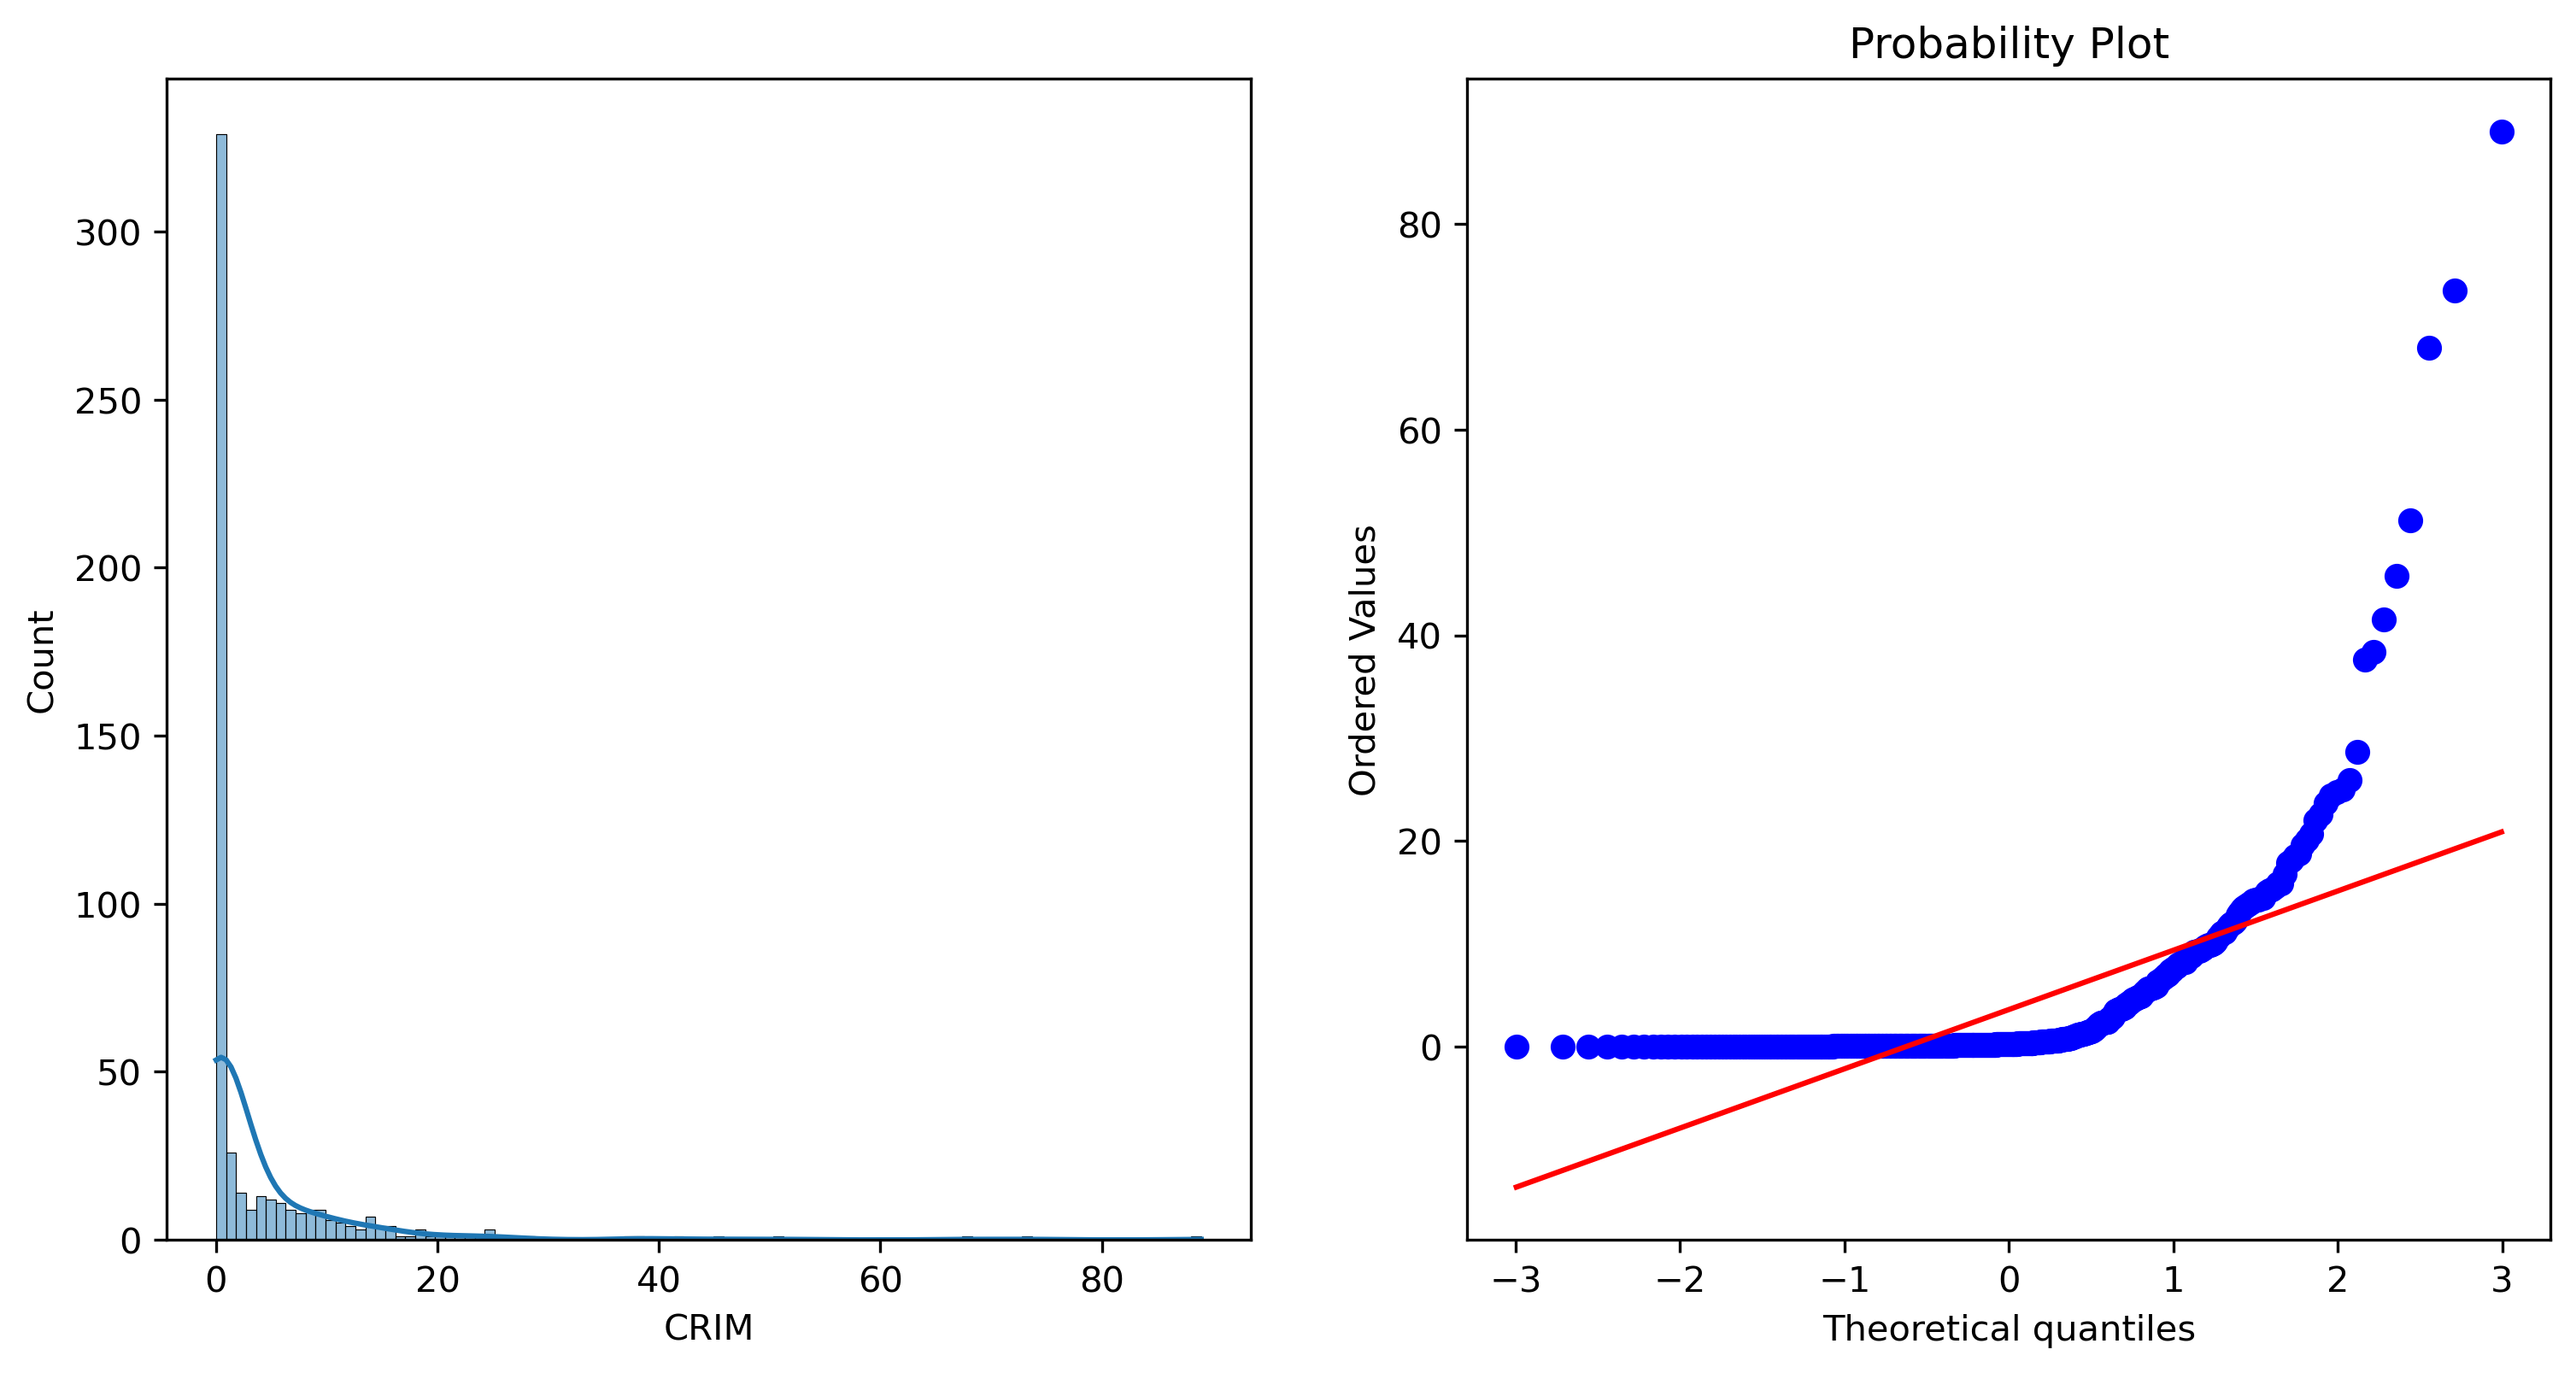

In [6]:
dist_(df,'CRIM')

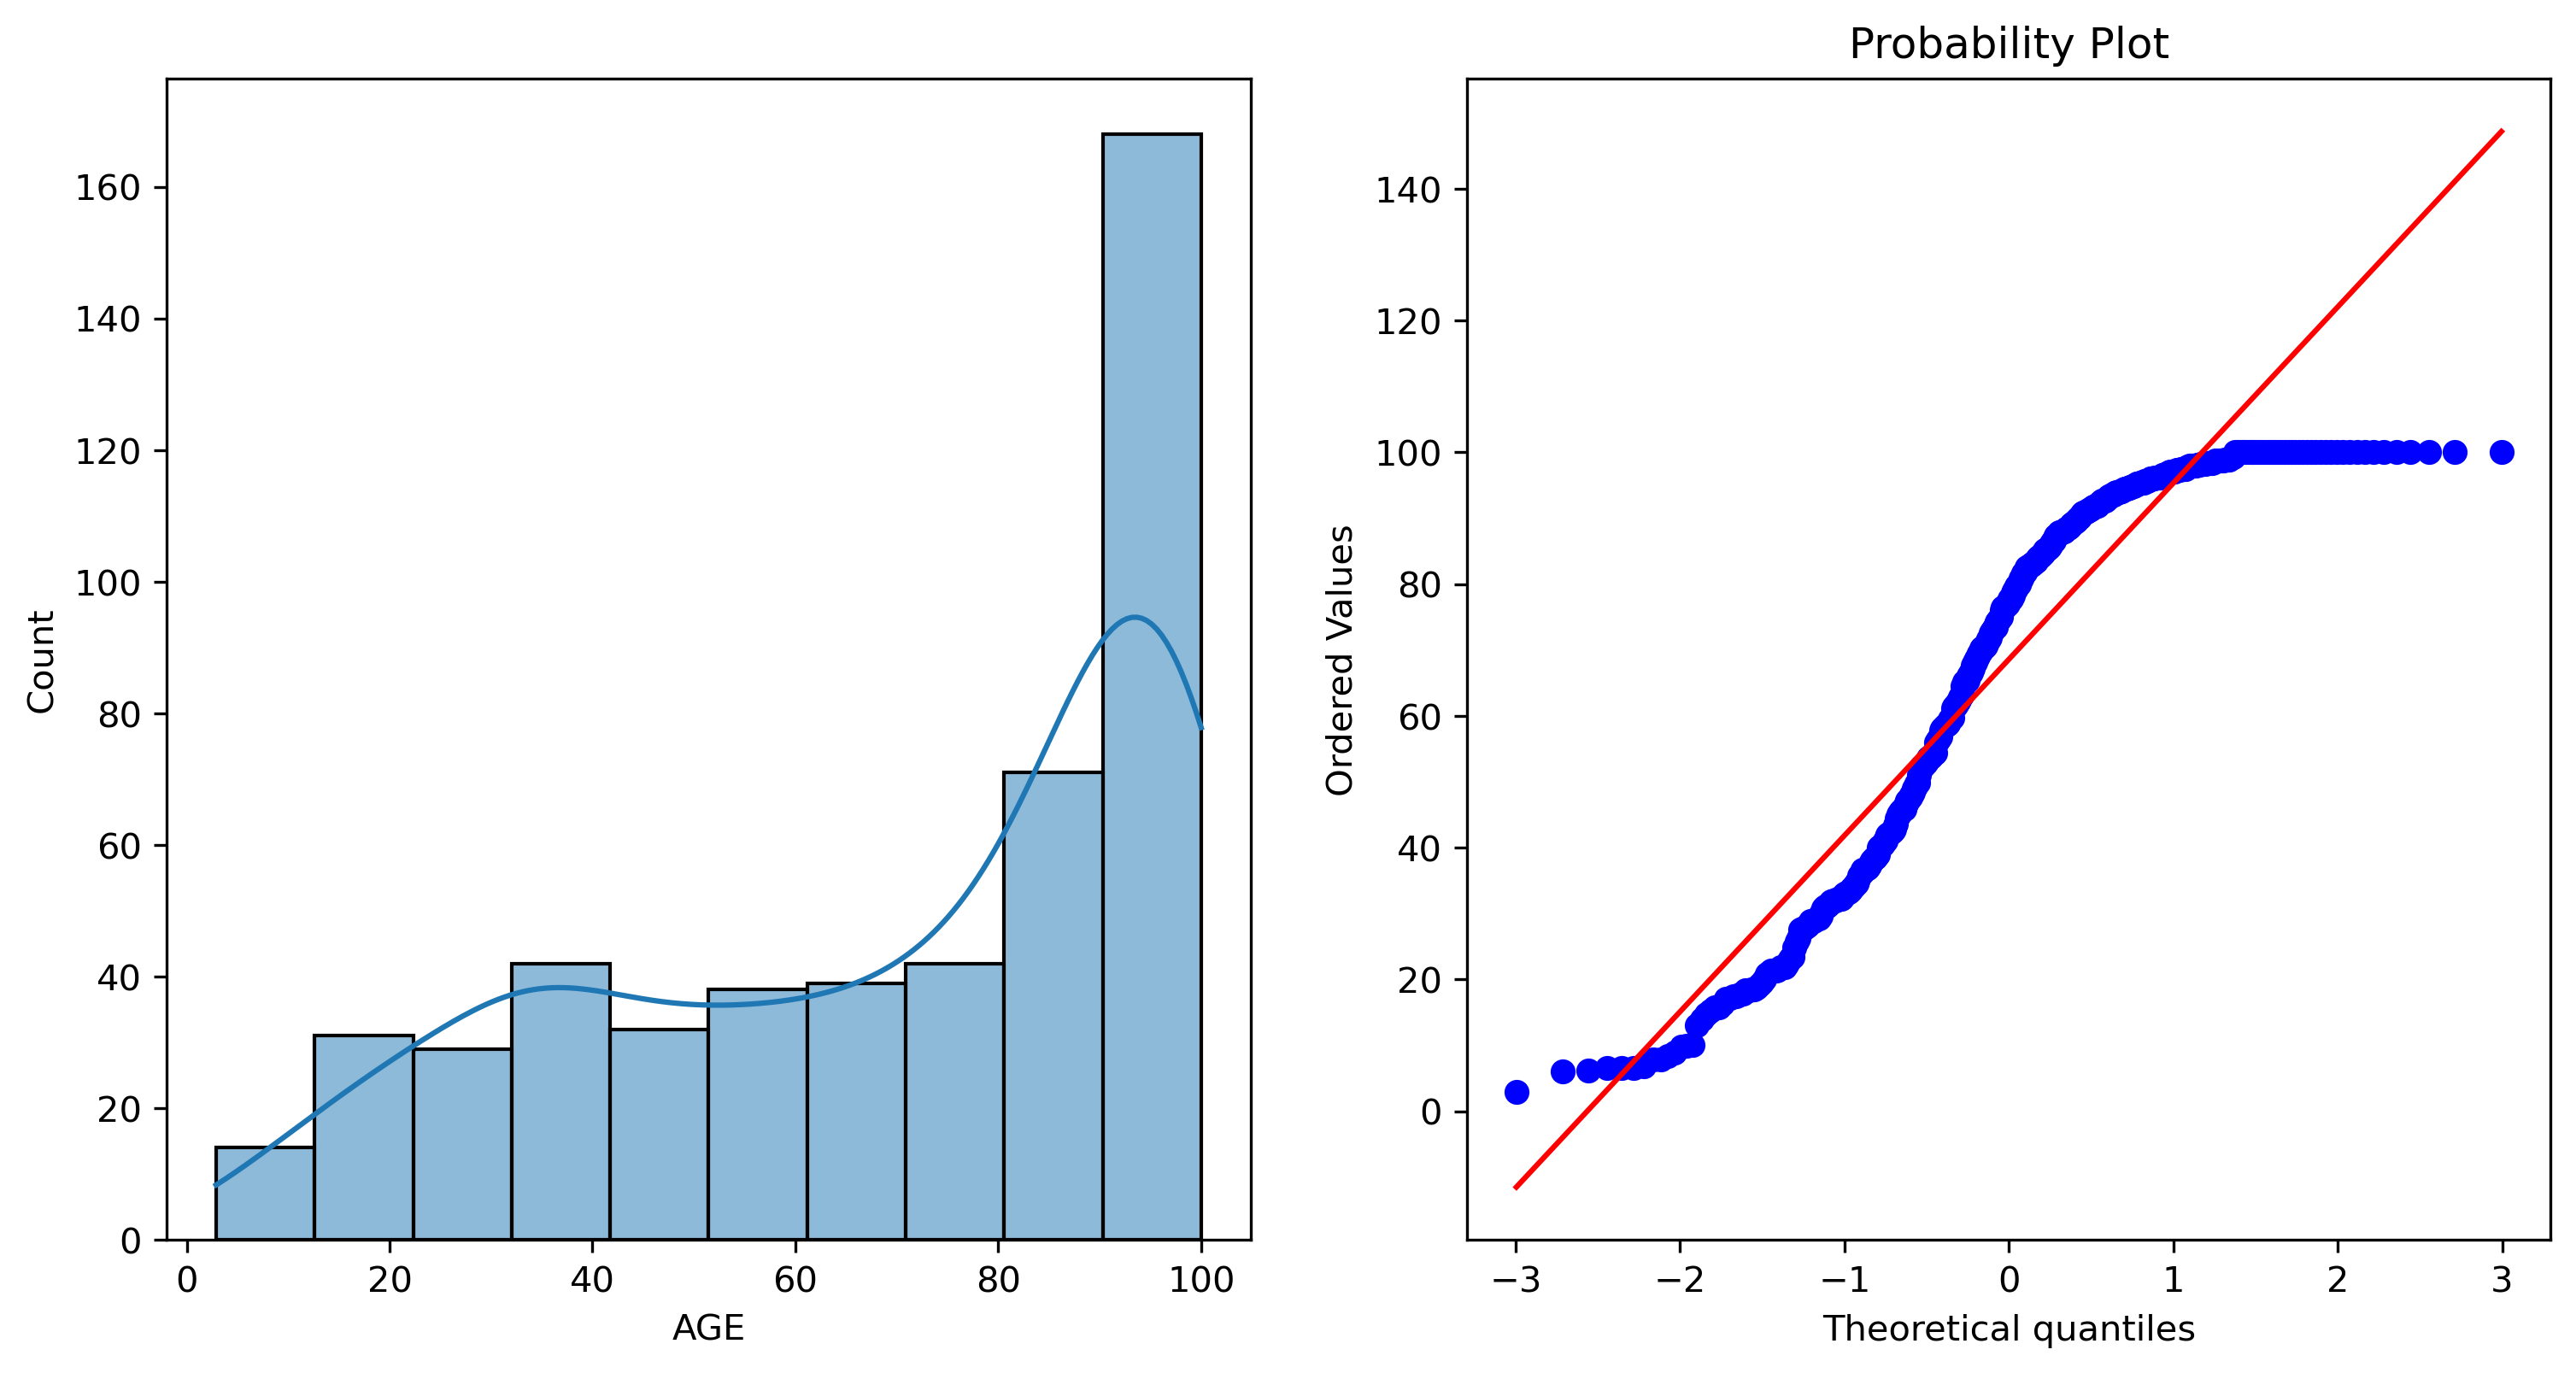

In [7]:
dist_(df,'AGE')

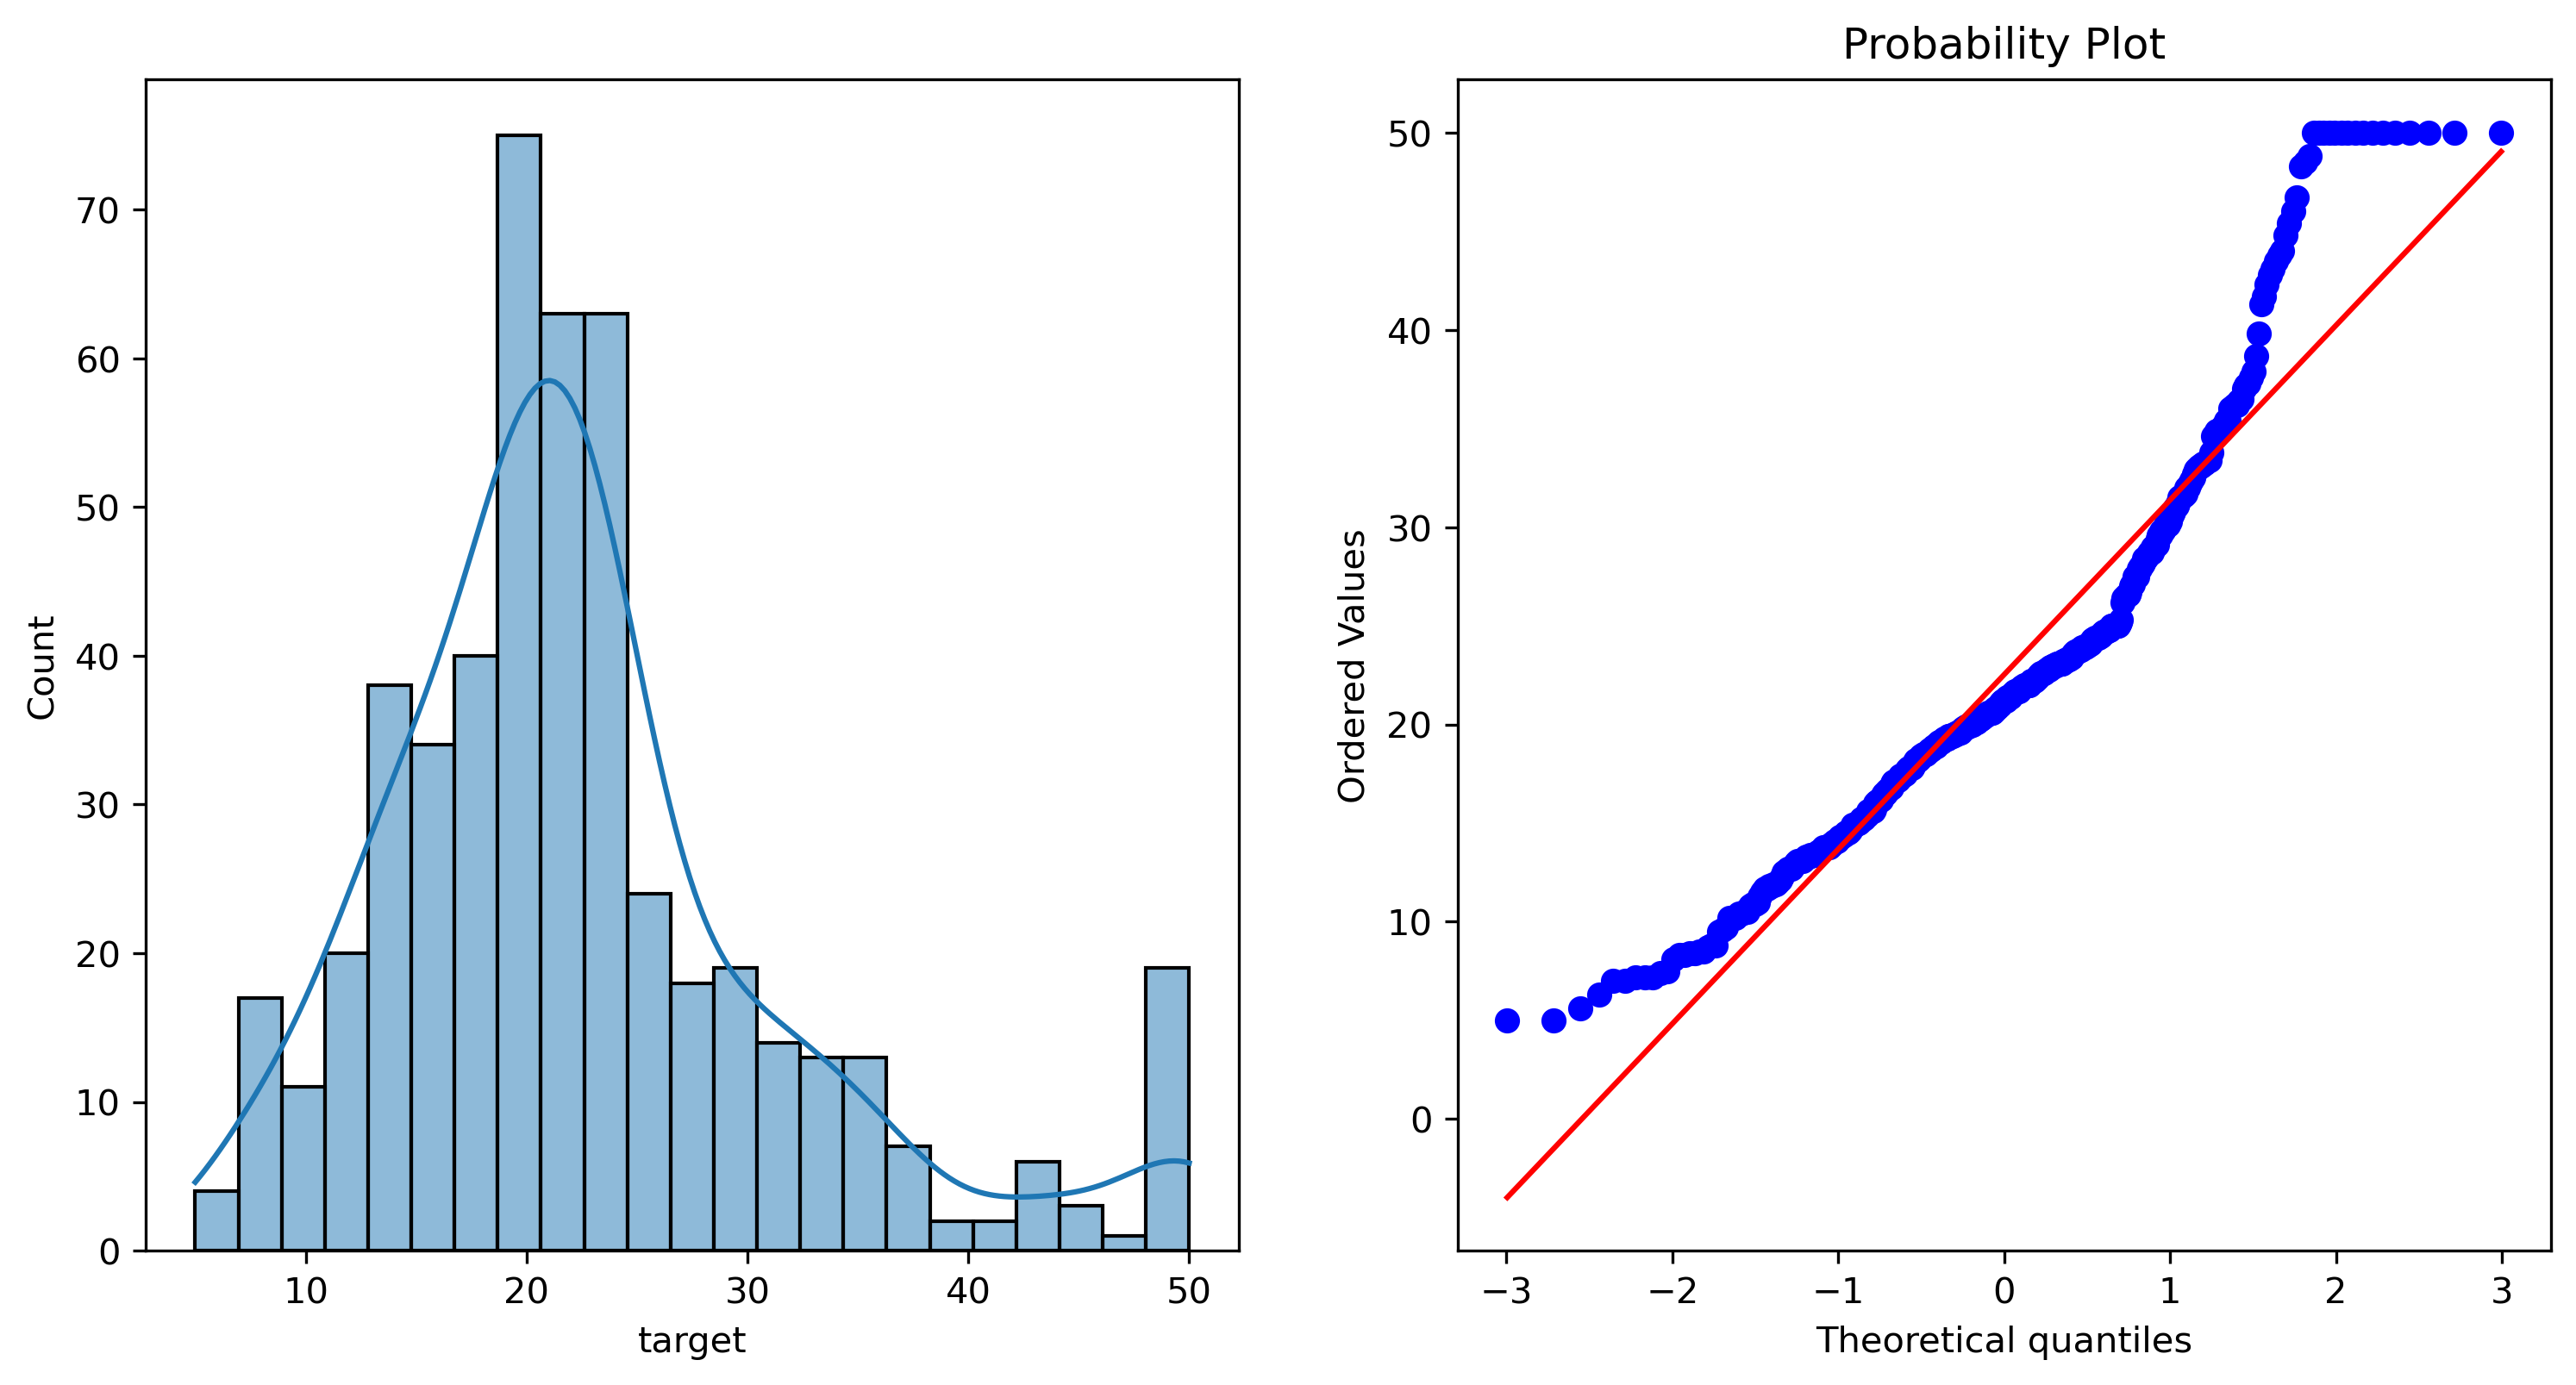

In [8]:
dist_(df,'target')

## transform to log scale

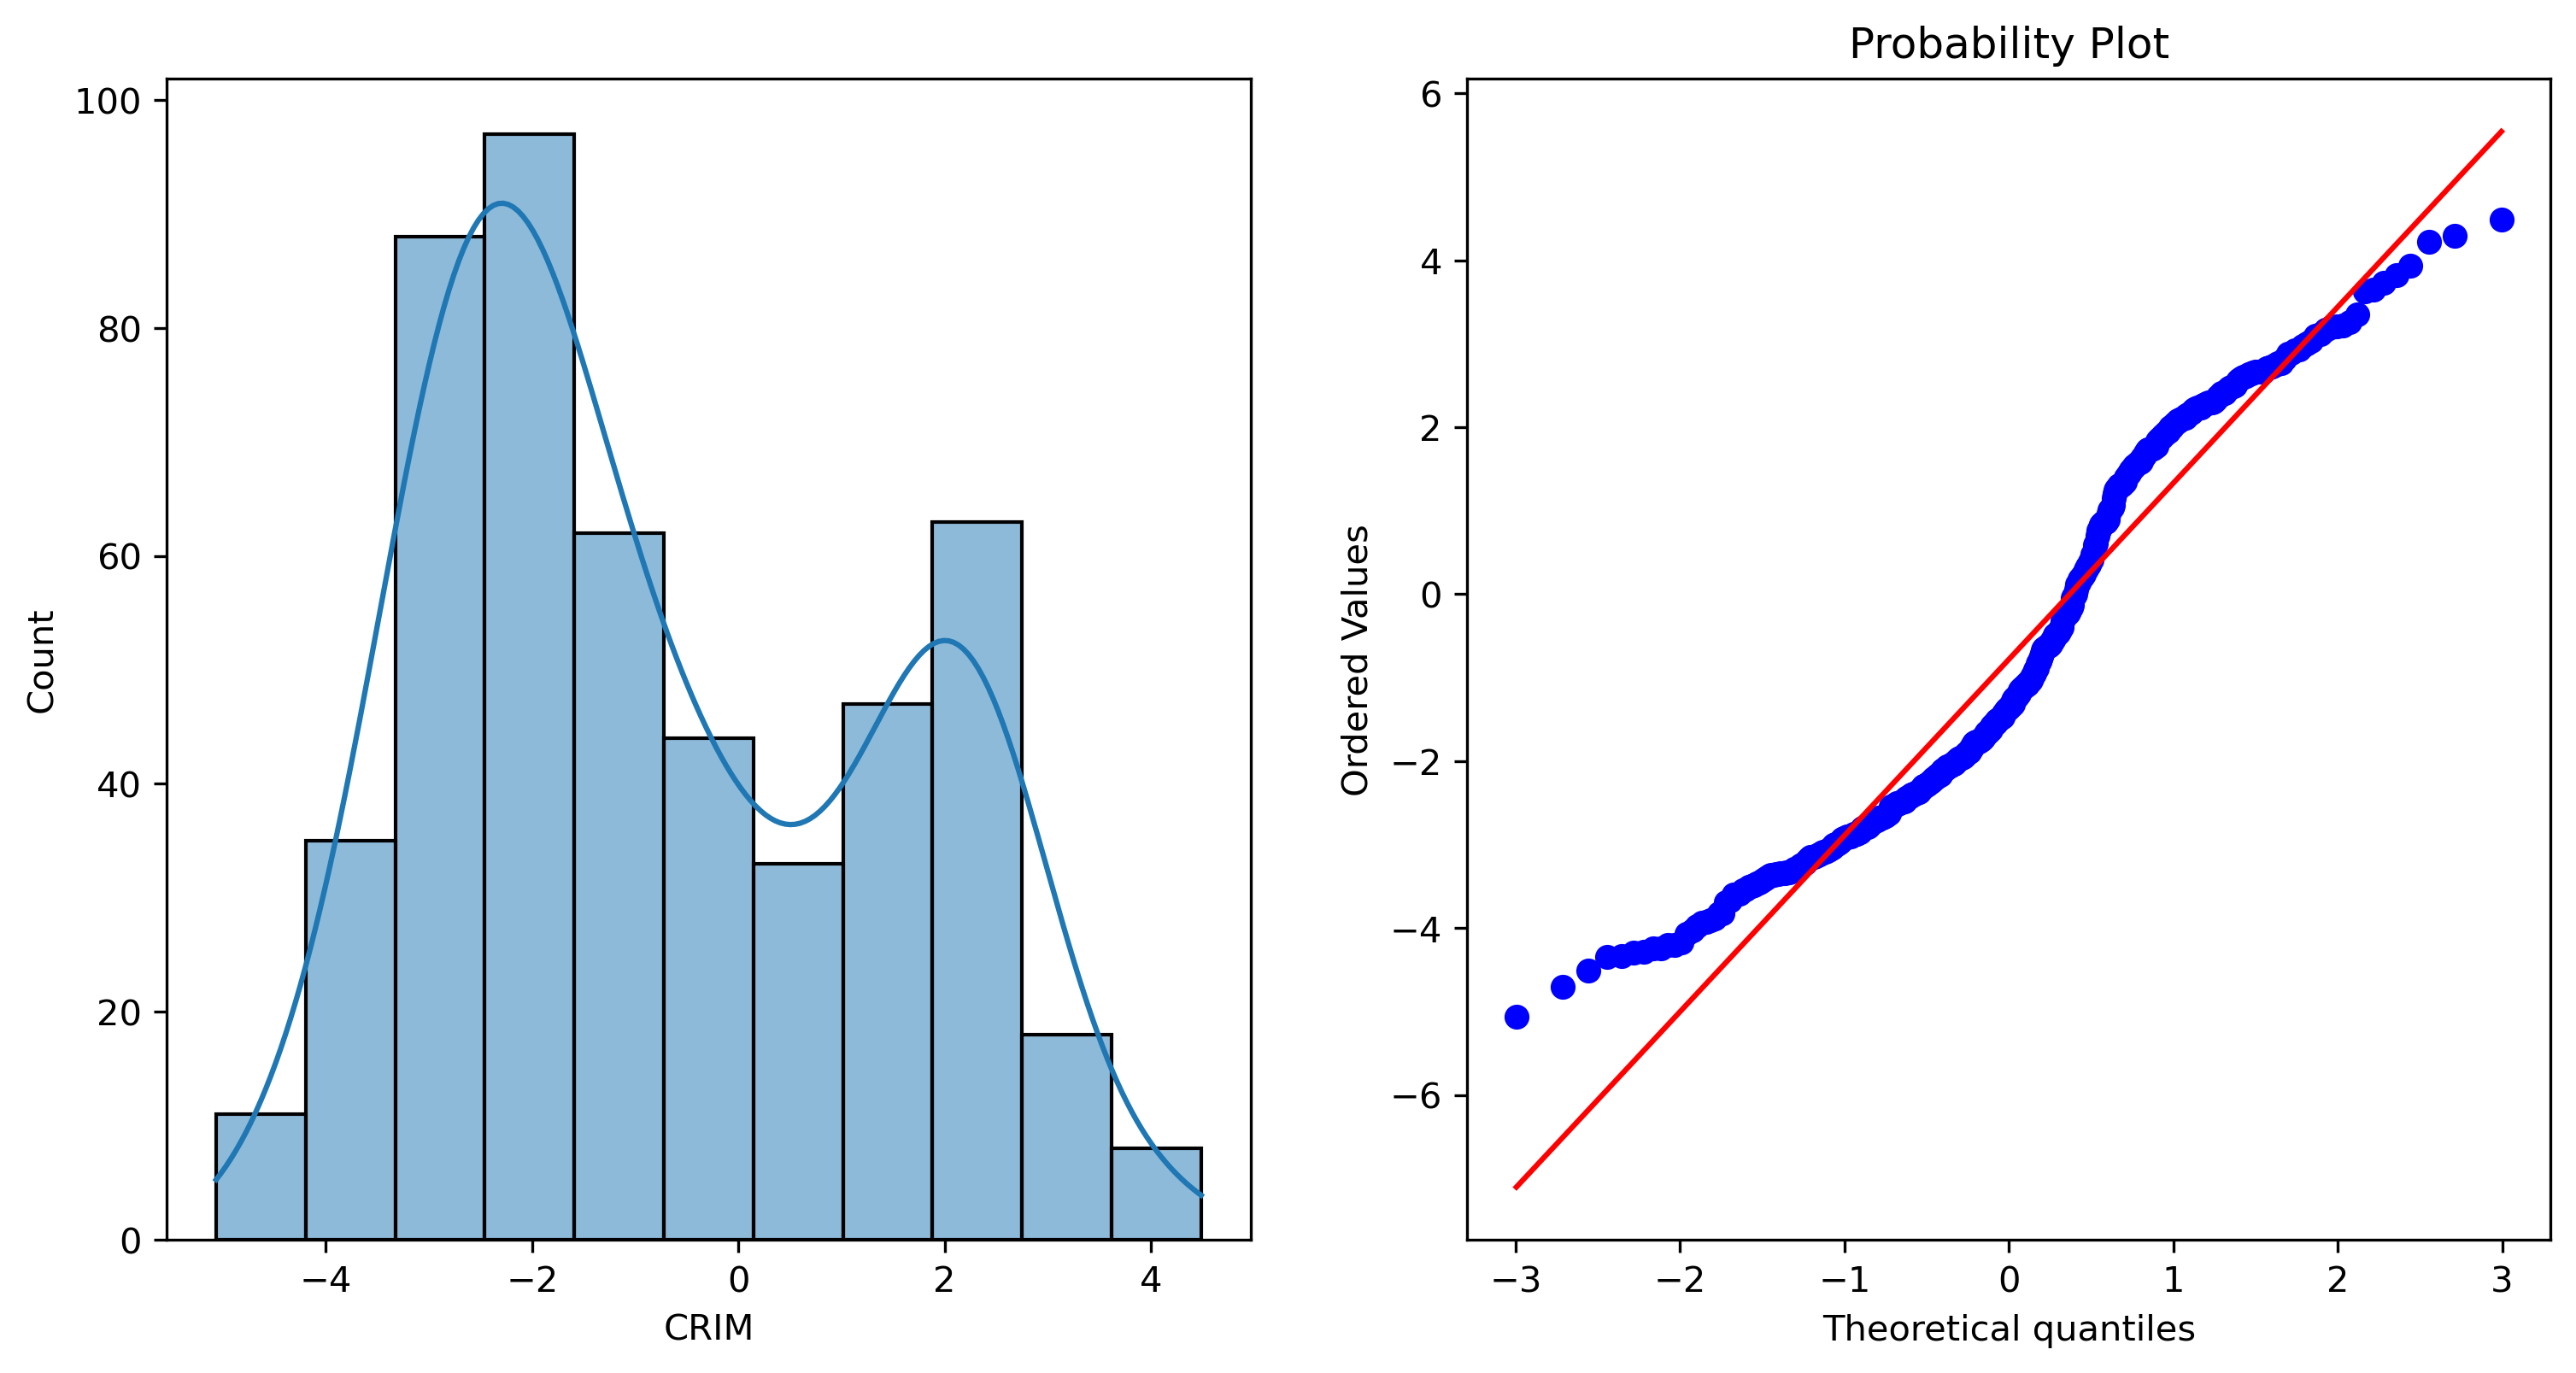

In [9]:

dist_(np.log(df),'CRIM')

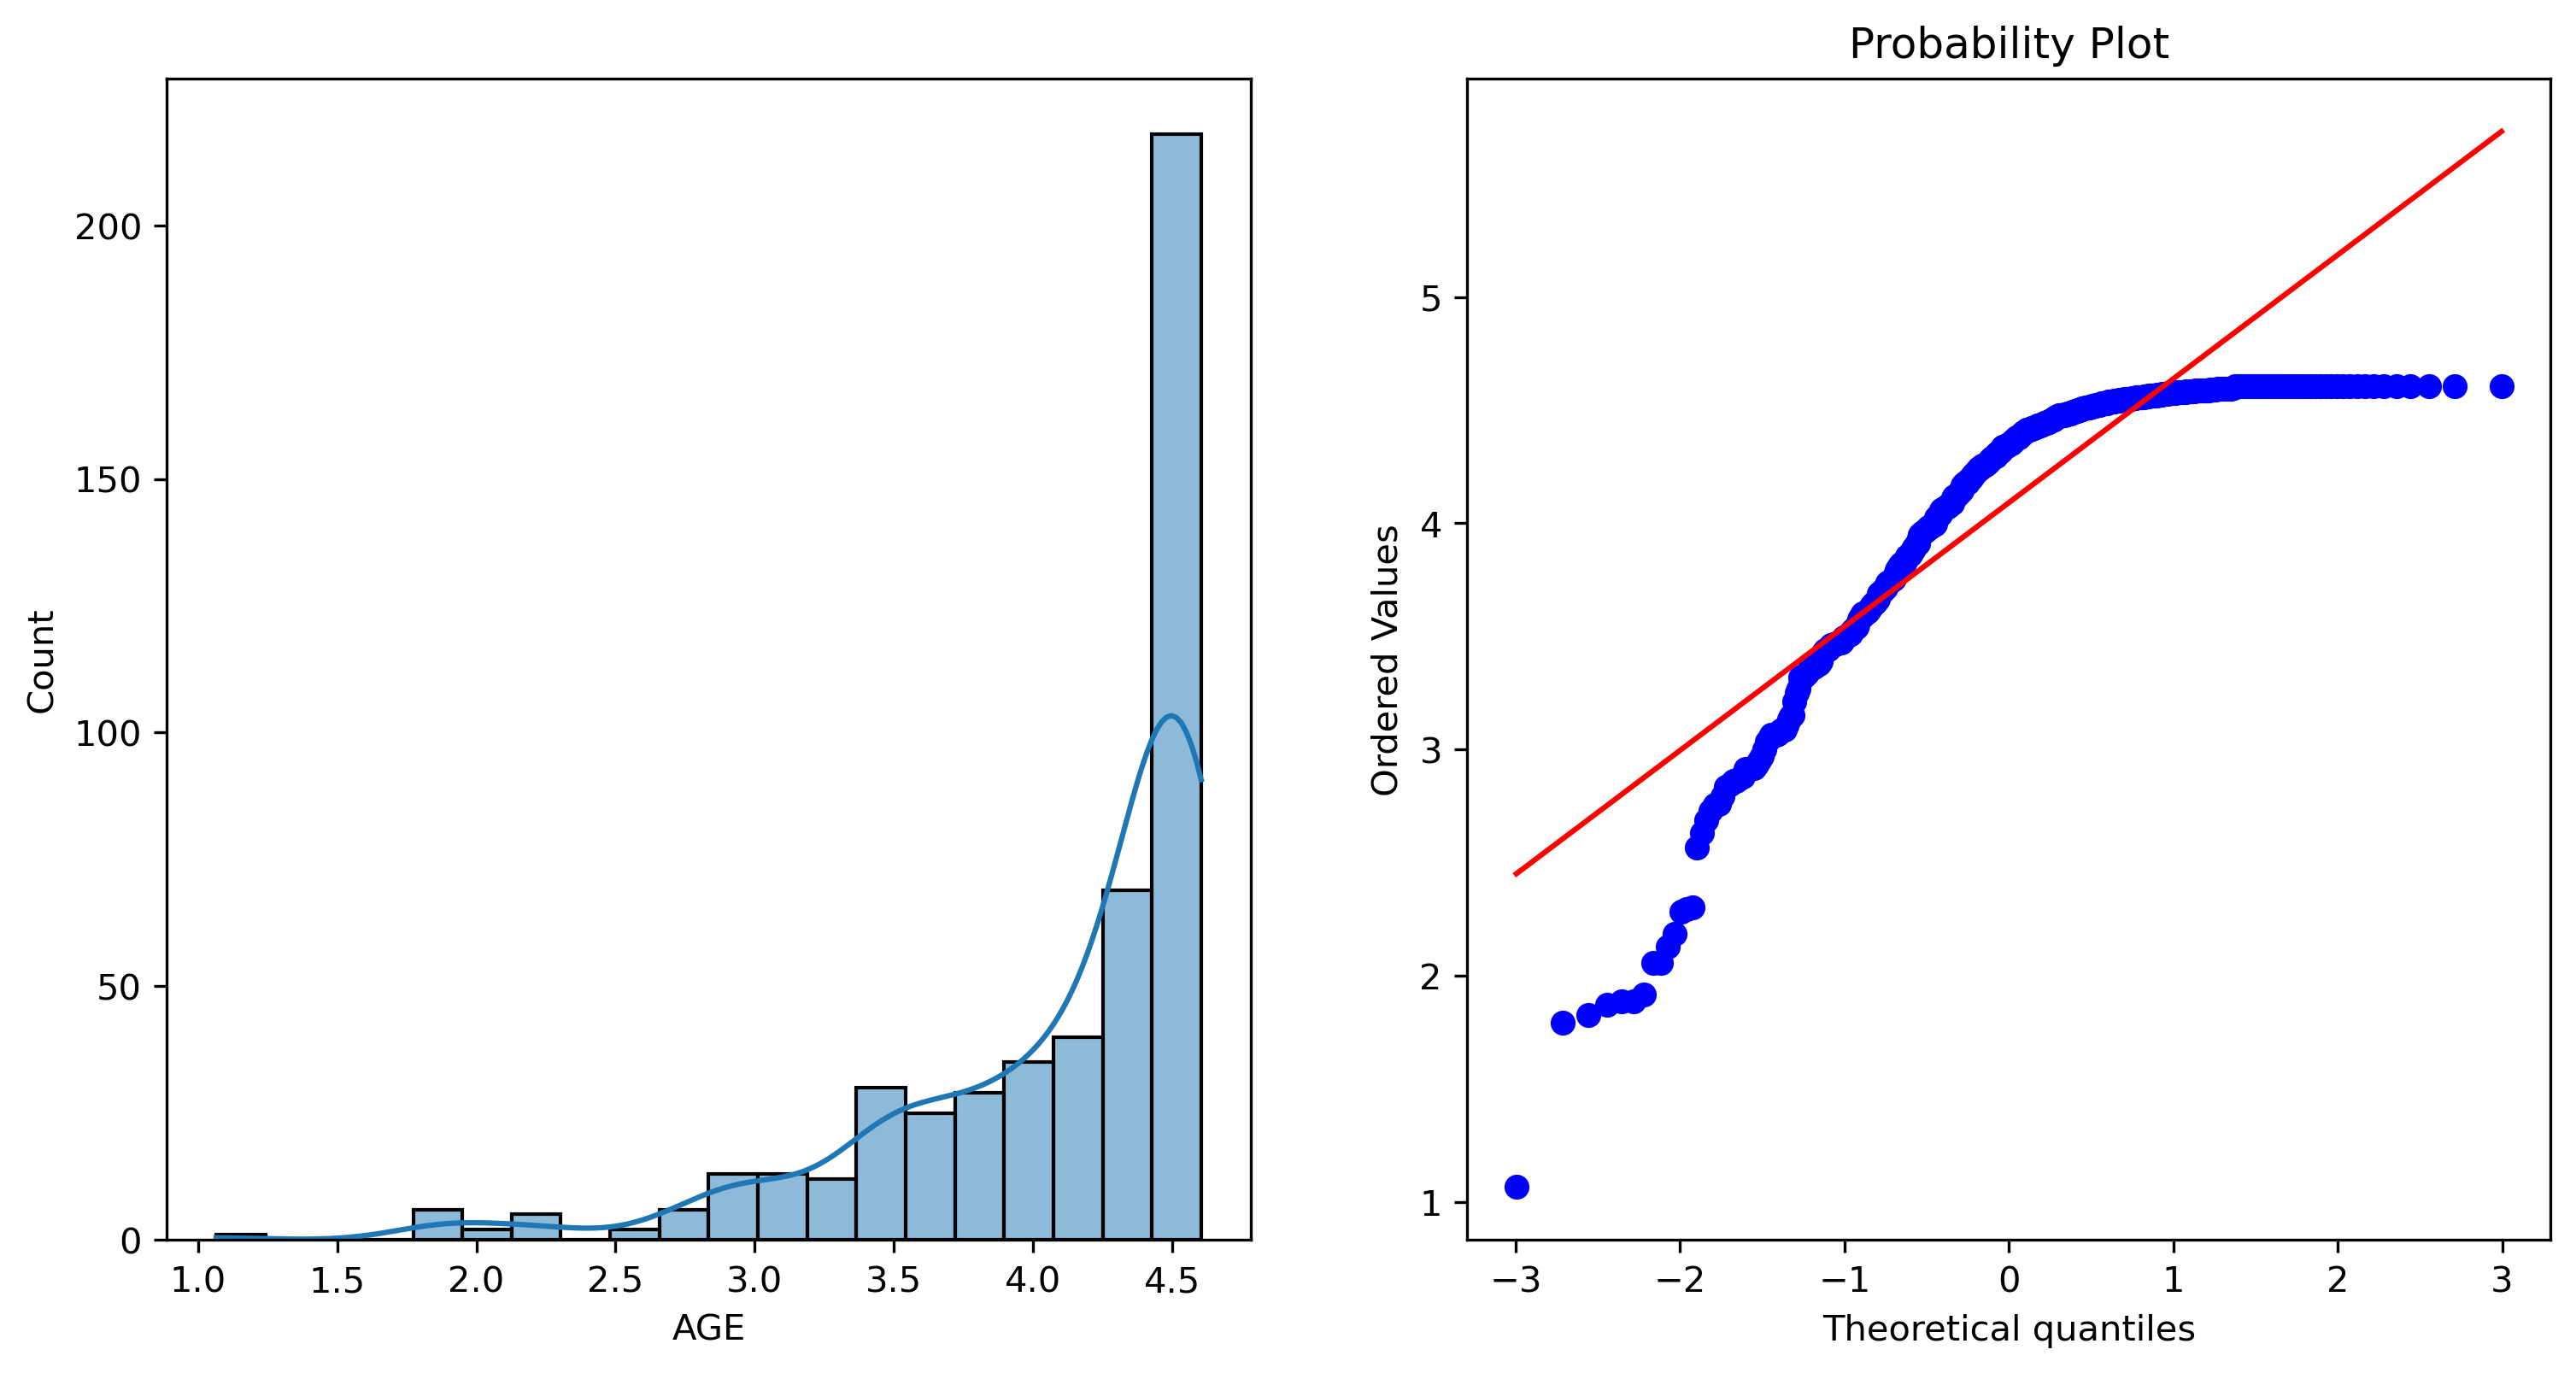

In [10]:
dist_(np.log(df),'AGE')

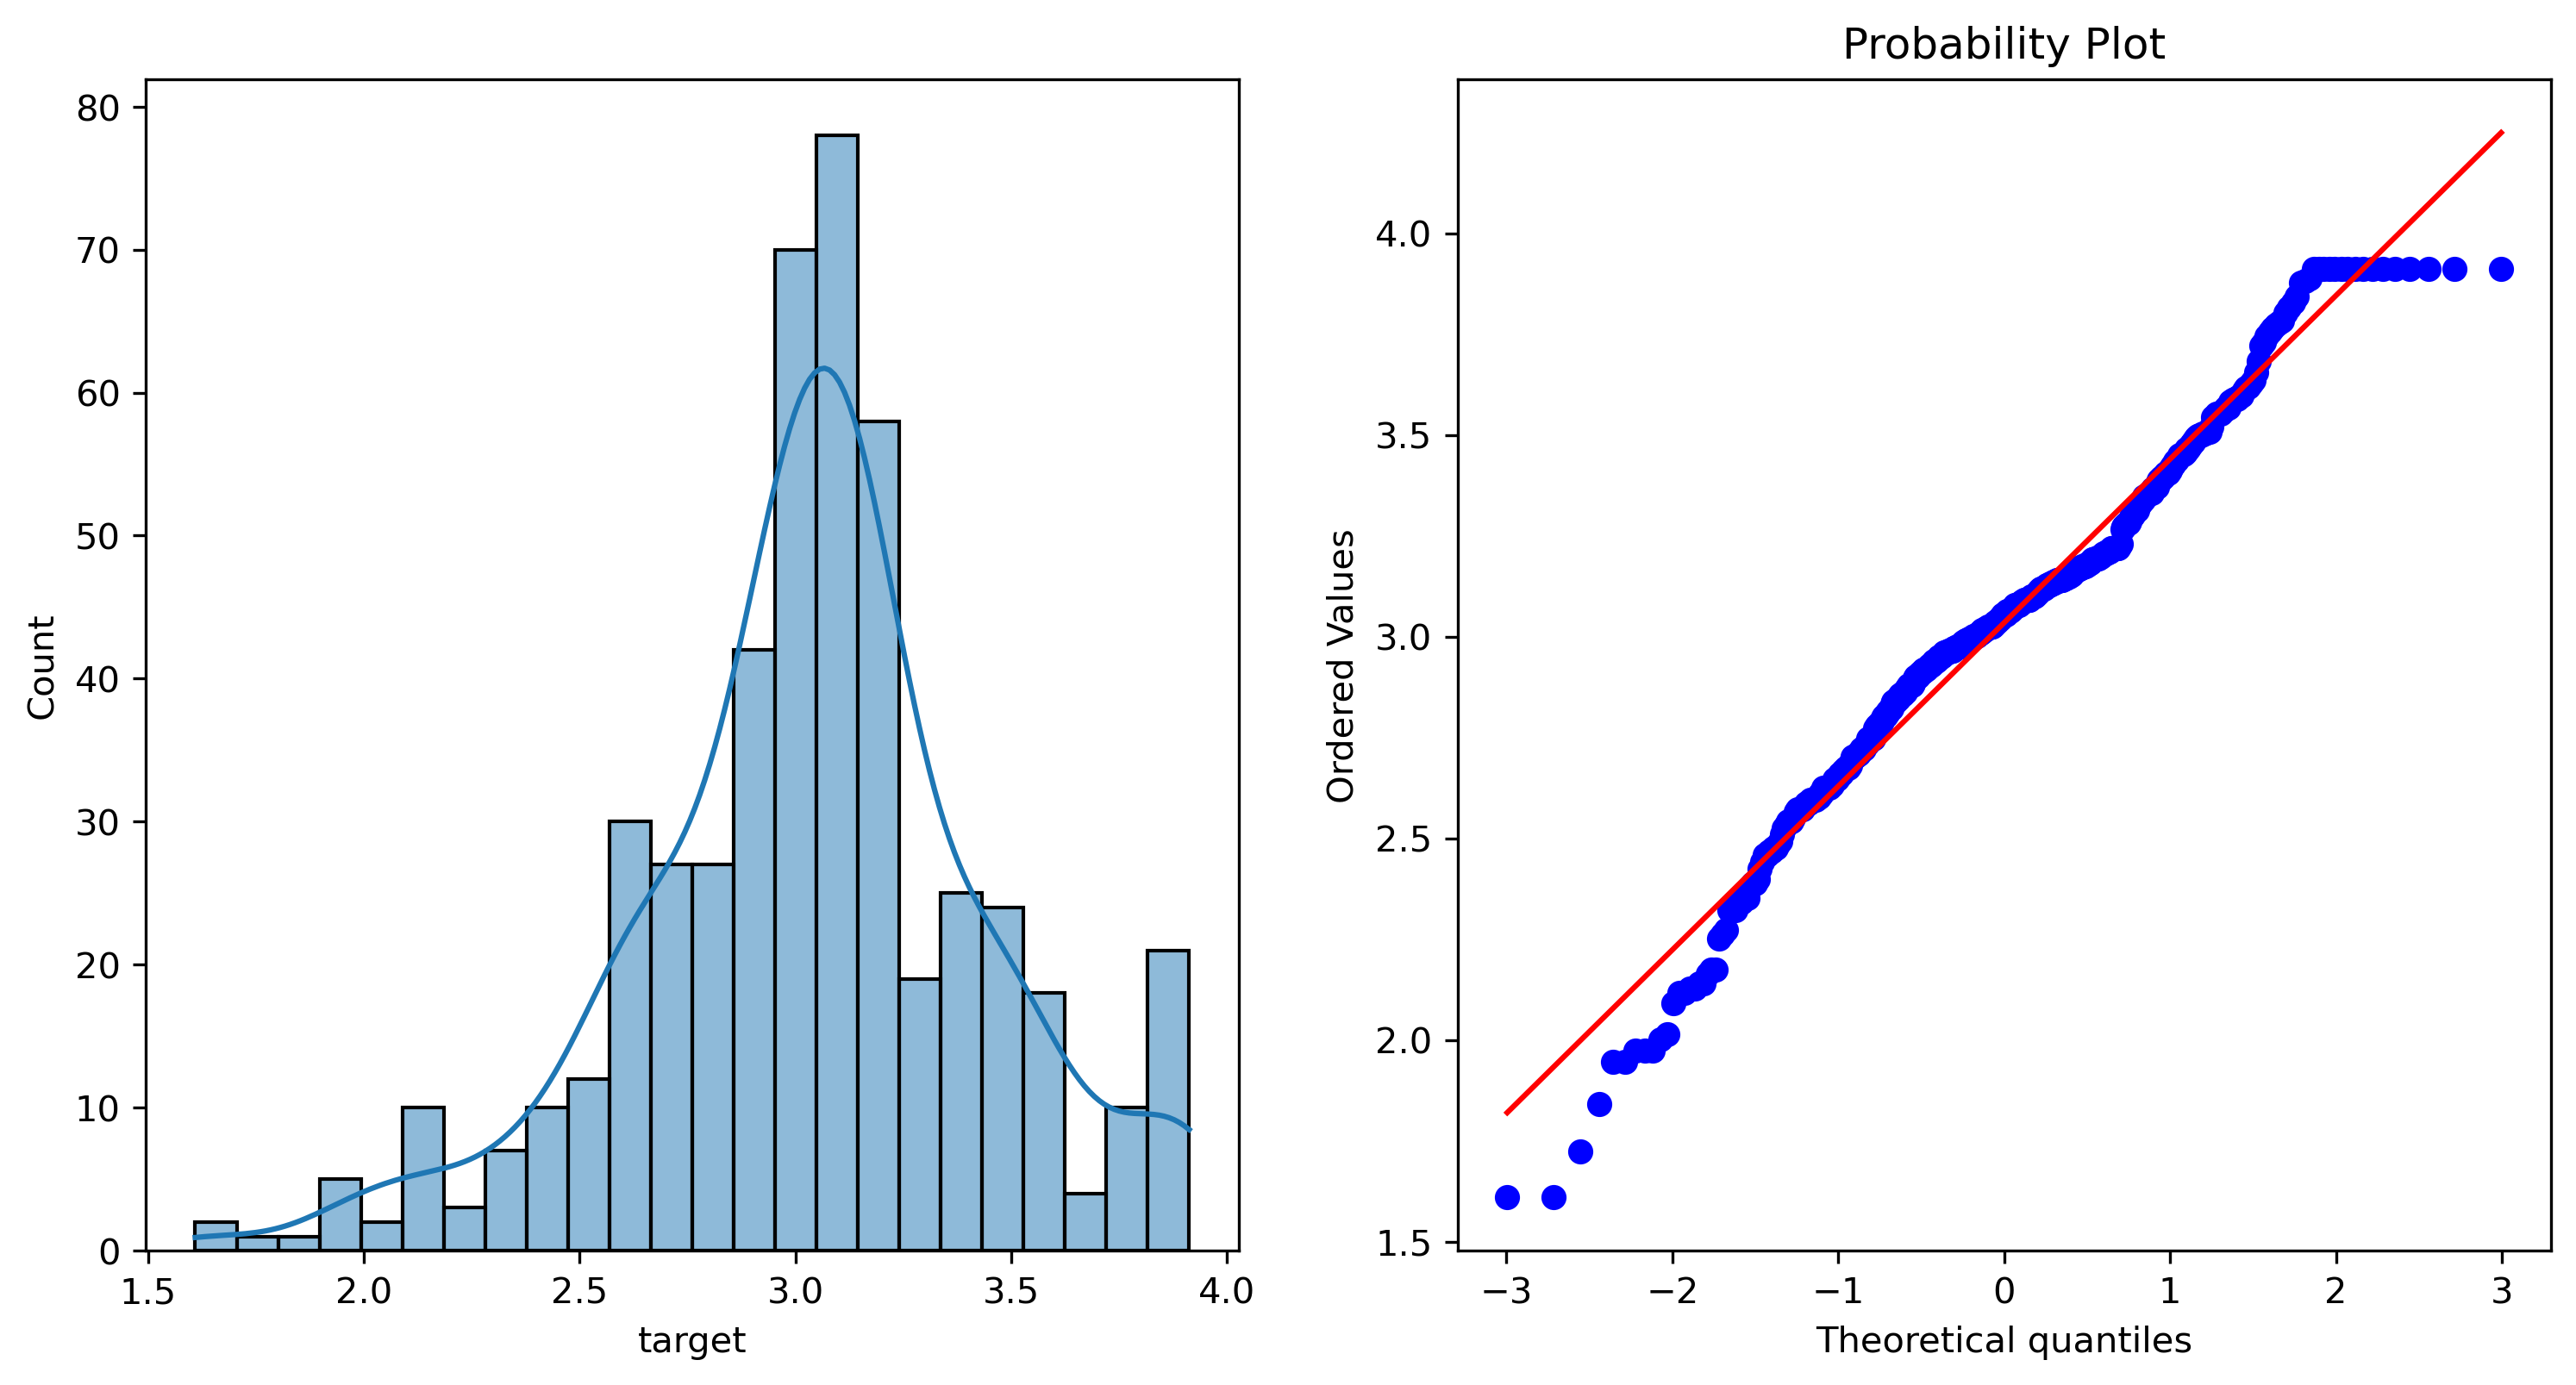

In [11]:
dist_(np.log(df),'target')

In [12]:
# using feature engine
transformer = trans.LogTransformer(variables=['CRIM','AGE','target'])
transformer.fit(df)
transformer.transform(df)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,-5.064036,18.0,2.31,0.0,0.538,6.575,4.177459,4.0900,1.0,296.0,15.3,396.90,4.98,3.178054
1,-3.600502,0.0,7.07,0.0,0.469,6.421,4.368181,4.9671,2.0,242.0,17.8,396.90,9.14,3.072693
2,-3.601235,0.0,7.07,0.0,0.469,7.185,4.112512,4.9671,2.0,242.0,17.8,392.83,4.03,3.546740
3,-3.430523,0.0,2.18,0.0,0.458,6.998,3.824284,6.0622,3.0,222.0,18.7,394.63,2.94,3.508556
4,-2.672924,0.0,2.18,0.0,0.458,7.147,3.992681,6.0622,3.0,222.0,18.7,396.90,5.33,3.589059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-2.770511,0.0,11.93,0.0,0.573,6.593,4.235555,2.4786,1.0,273.0,21.0,391.99,9.67,3.109061
502,-3.095111,0.0,11.93,0.0,0.573,6.120,4.339902,2.2875,1.0,273.0,21.0,396.90,9.08,3.025291
503,-2.800824,0.0,11.93,0.0,0.573,6.976,4.510860,2.1675,1.0,273.0,21.0,396.90,5.64,3.173878
504,-2.211009,0.0,11.93,0.0,0.573,6.794,4.492001,2.3889,1.0,273.0,21.0,393.45,6.48,3.091042


## Transforming variables with the reciprocal function
The reciprocal function, defined as 1/x, is a strong transformation with a very drastic effect on the variable
distribution. It isn't defined for the value 0, but it can be applied to negative numbers.

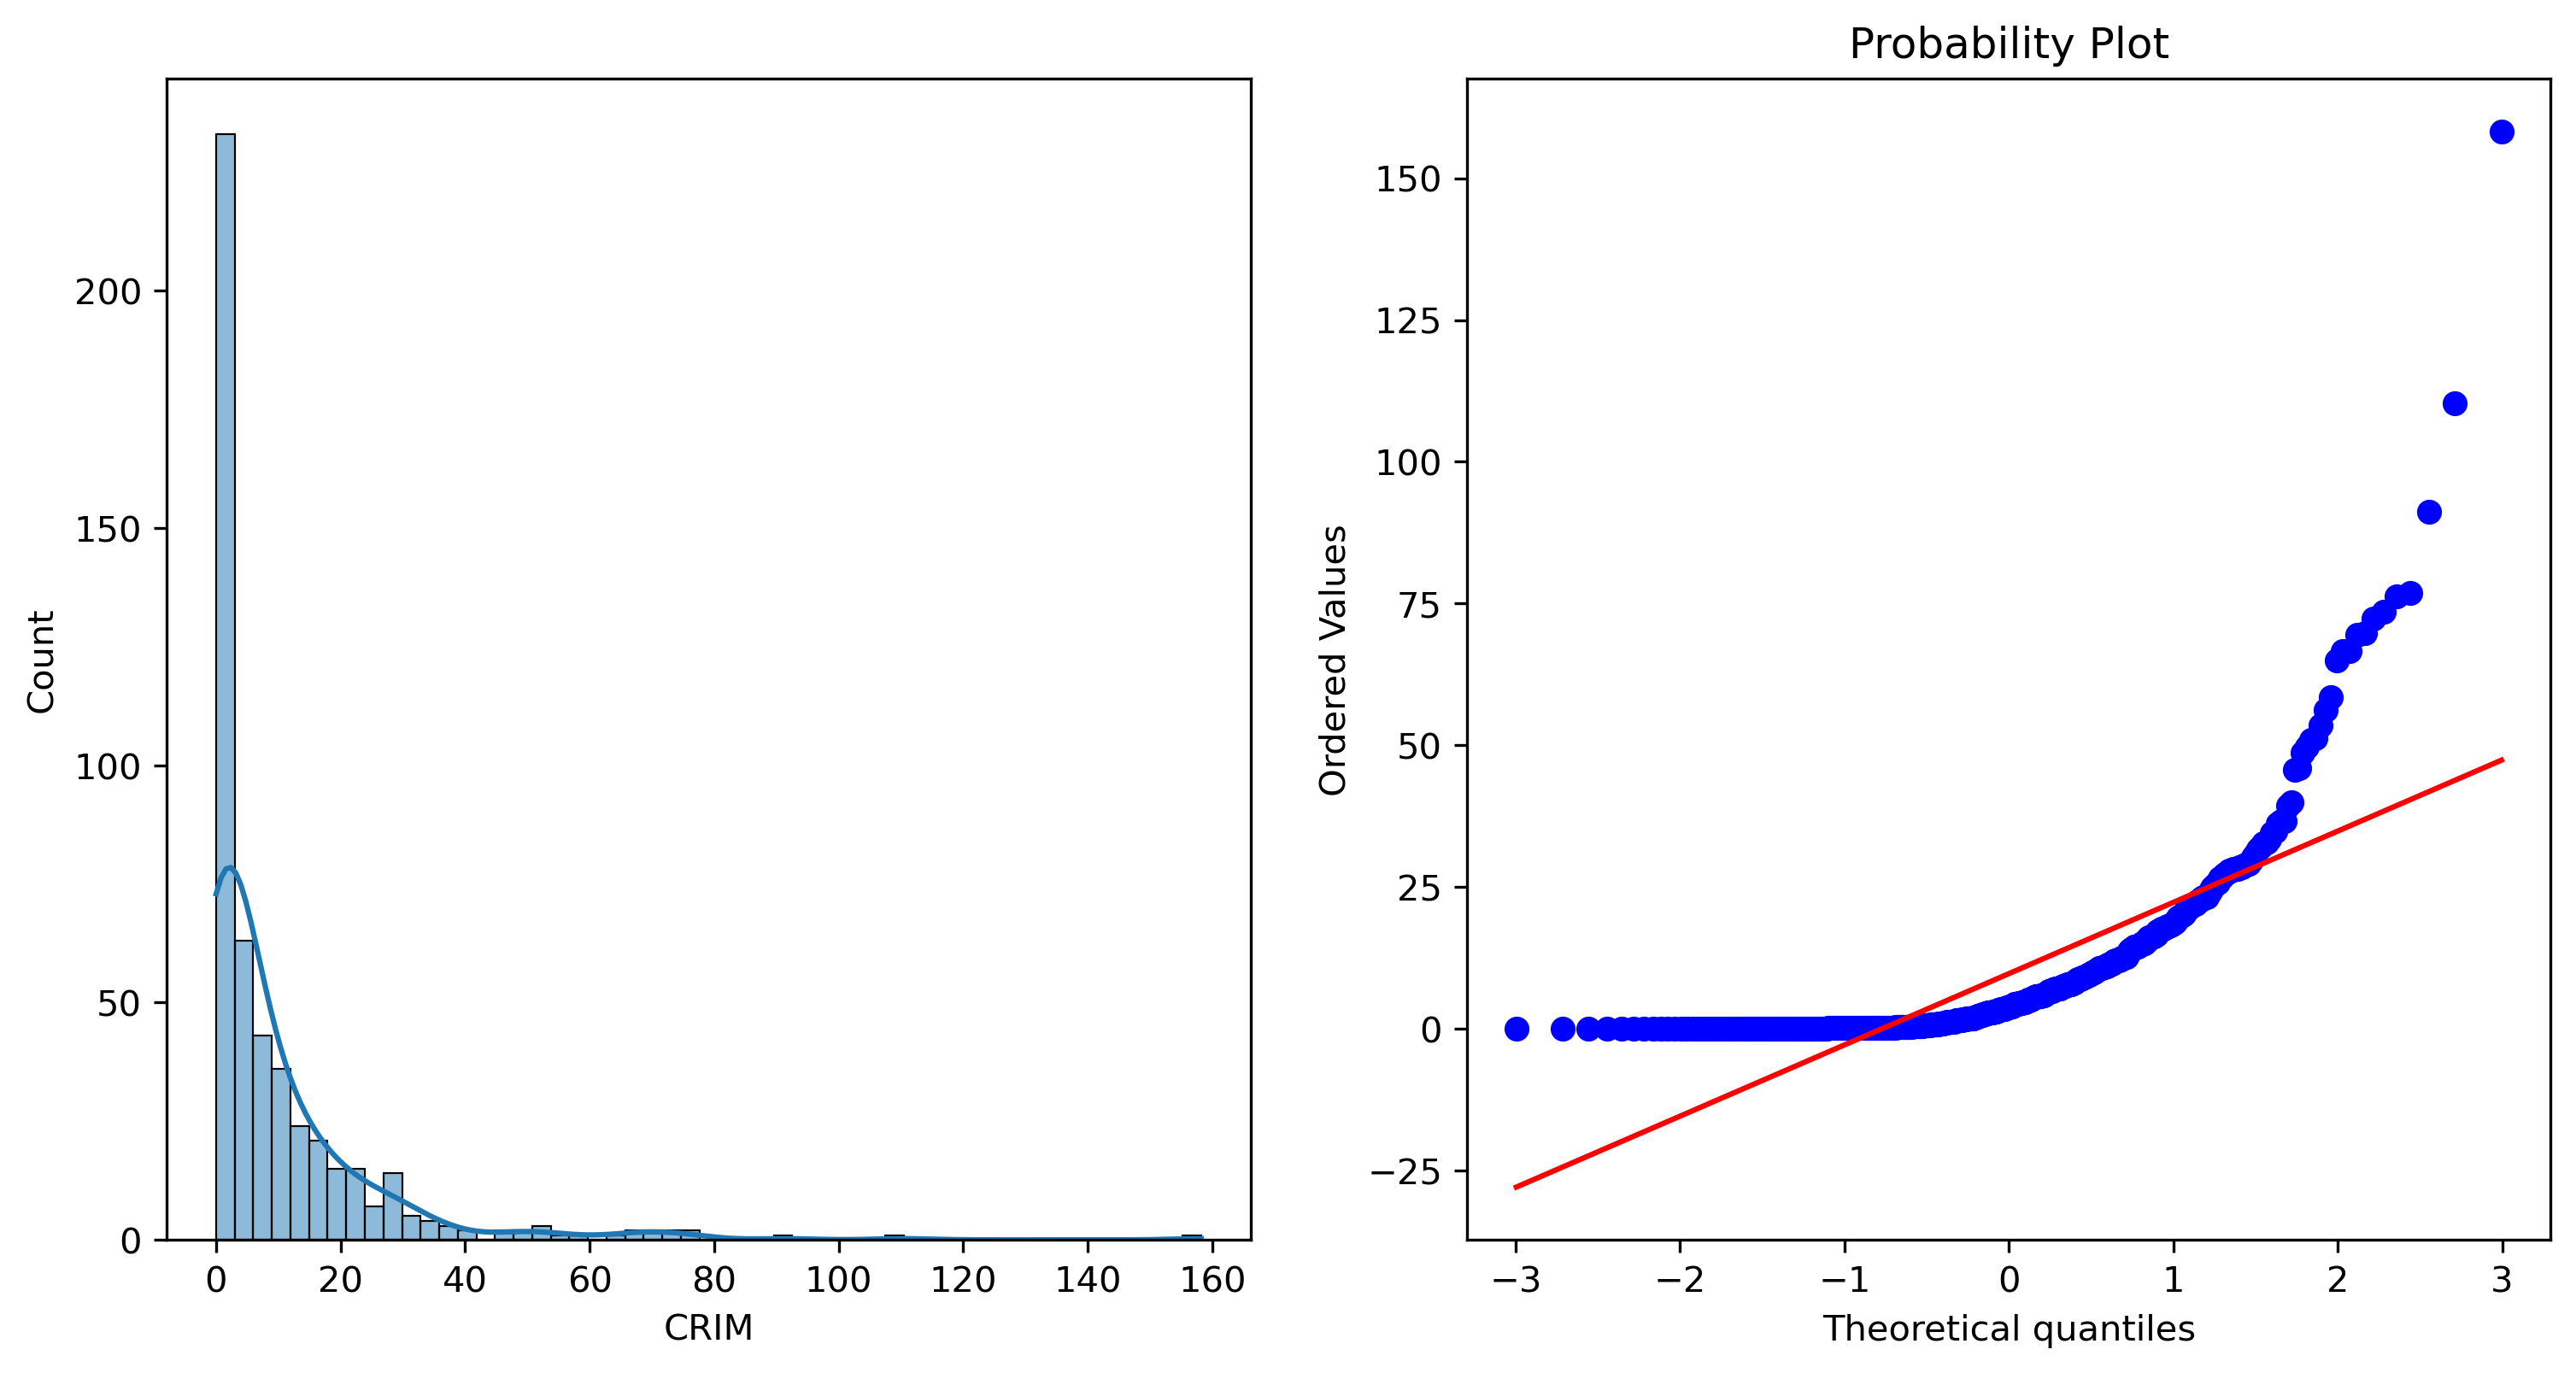

In [13]:
dist_(np.reciprocal(df),'CRIM')

In [14]:
transformer = trans.reciprocal.ReciprocalTransformer(variables=['CRIM','AGE','target'])
transformer.fit(df)
rec_scl_data = transformer.transform(df)
rec_scl_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,158.227848,18.0,2.31,0.0,0.538,6.575,0.015337,4.0900,1.0,296.0,15.3,396.90,4.98,0.041667
1,36.616624,0.0,7.07,0.0,0.469,6.421,0.012674,4.9671,2.0,242.0,17.8,396.90,9.14,0.046296
2,36.643459,0.0,7.07,0.0,0.469,7.185,0.016367,4.9671,2.0,242.0,17.8,392.83,4.03,0.028818
3,30.892802,0.0,2.18,0.0,0.458,6.998,0.021834,6.0622,3.0,222.0,18.7,394.63,2.94,0.029940
4,14.482259,0.0,2.18,0.0,0.458,7.147,0.018450,6.0622,3.0,222.0,18.7,396.90,5.33,0.027624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,15.966789,0.0,11.93,0.0,0.573,6.593,0.014472,2.4786,1.0,273.0,21.0,391.99,9.67,0.044643
502,22.089684,0.0,11.93,0.0,0.573,6.120,0.013038,2.2875,1.0,273.0,21.0,396.90,9.08,0.048544
503,16.458196,0.0,11.93,0.0,0.573,6.976,0.010989,2.1675,1.0,273.0,21.0,396.90,5.64,0.041841
504,9.124920,0.0,11.93,0.0,0.573,6.794,0.011198,2.3889,1.0,273.0,21.0,393.45,6.48,0.045455


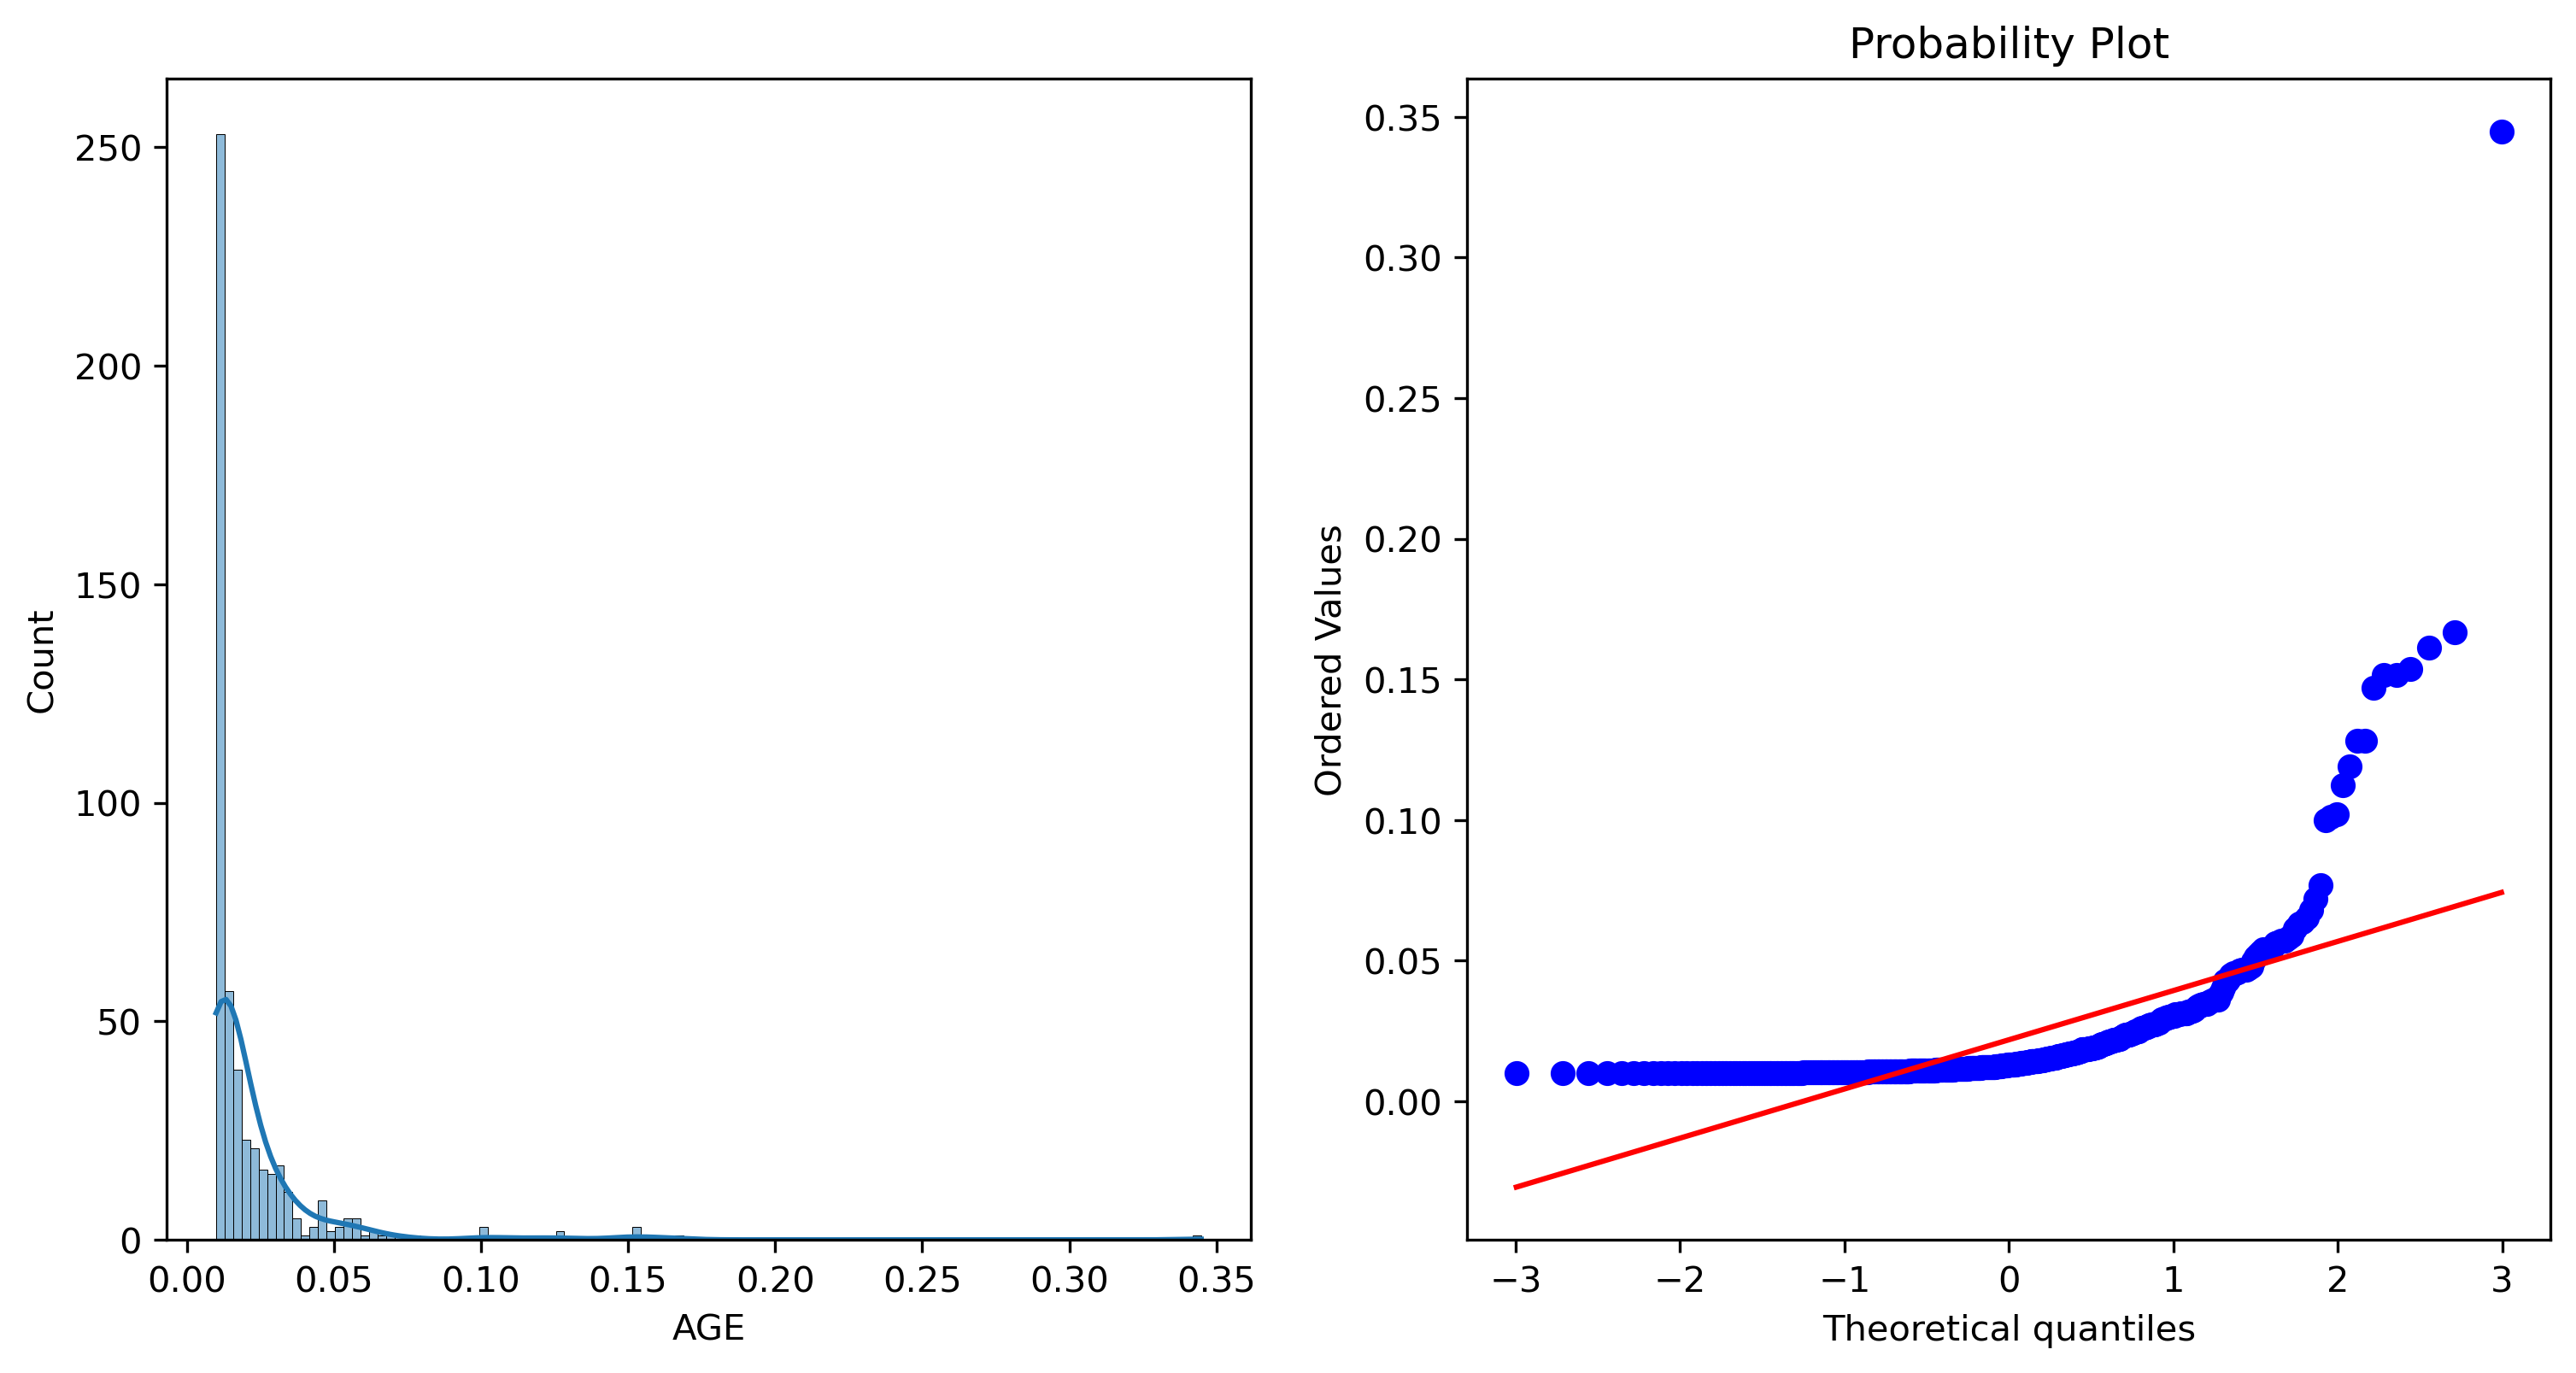

In [15]:
dist_(rec_scl_data,'AGE')

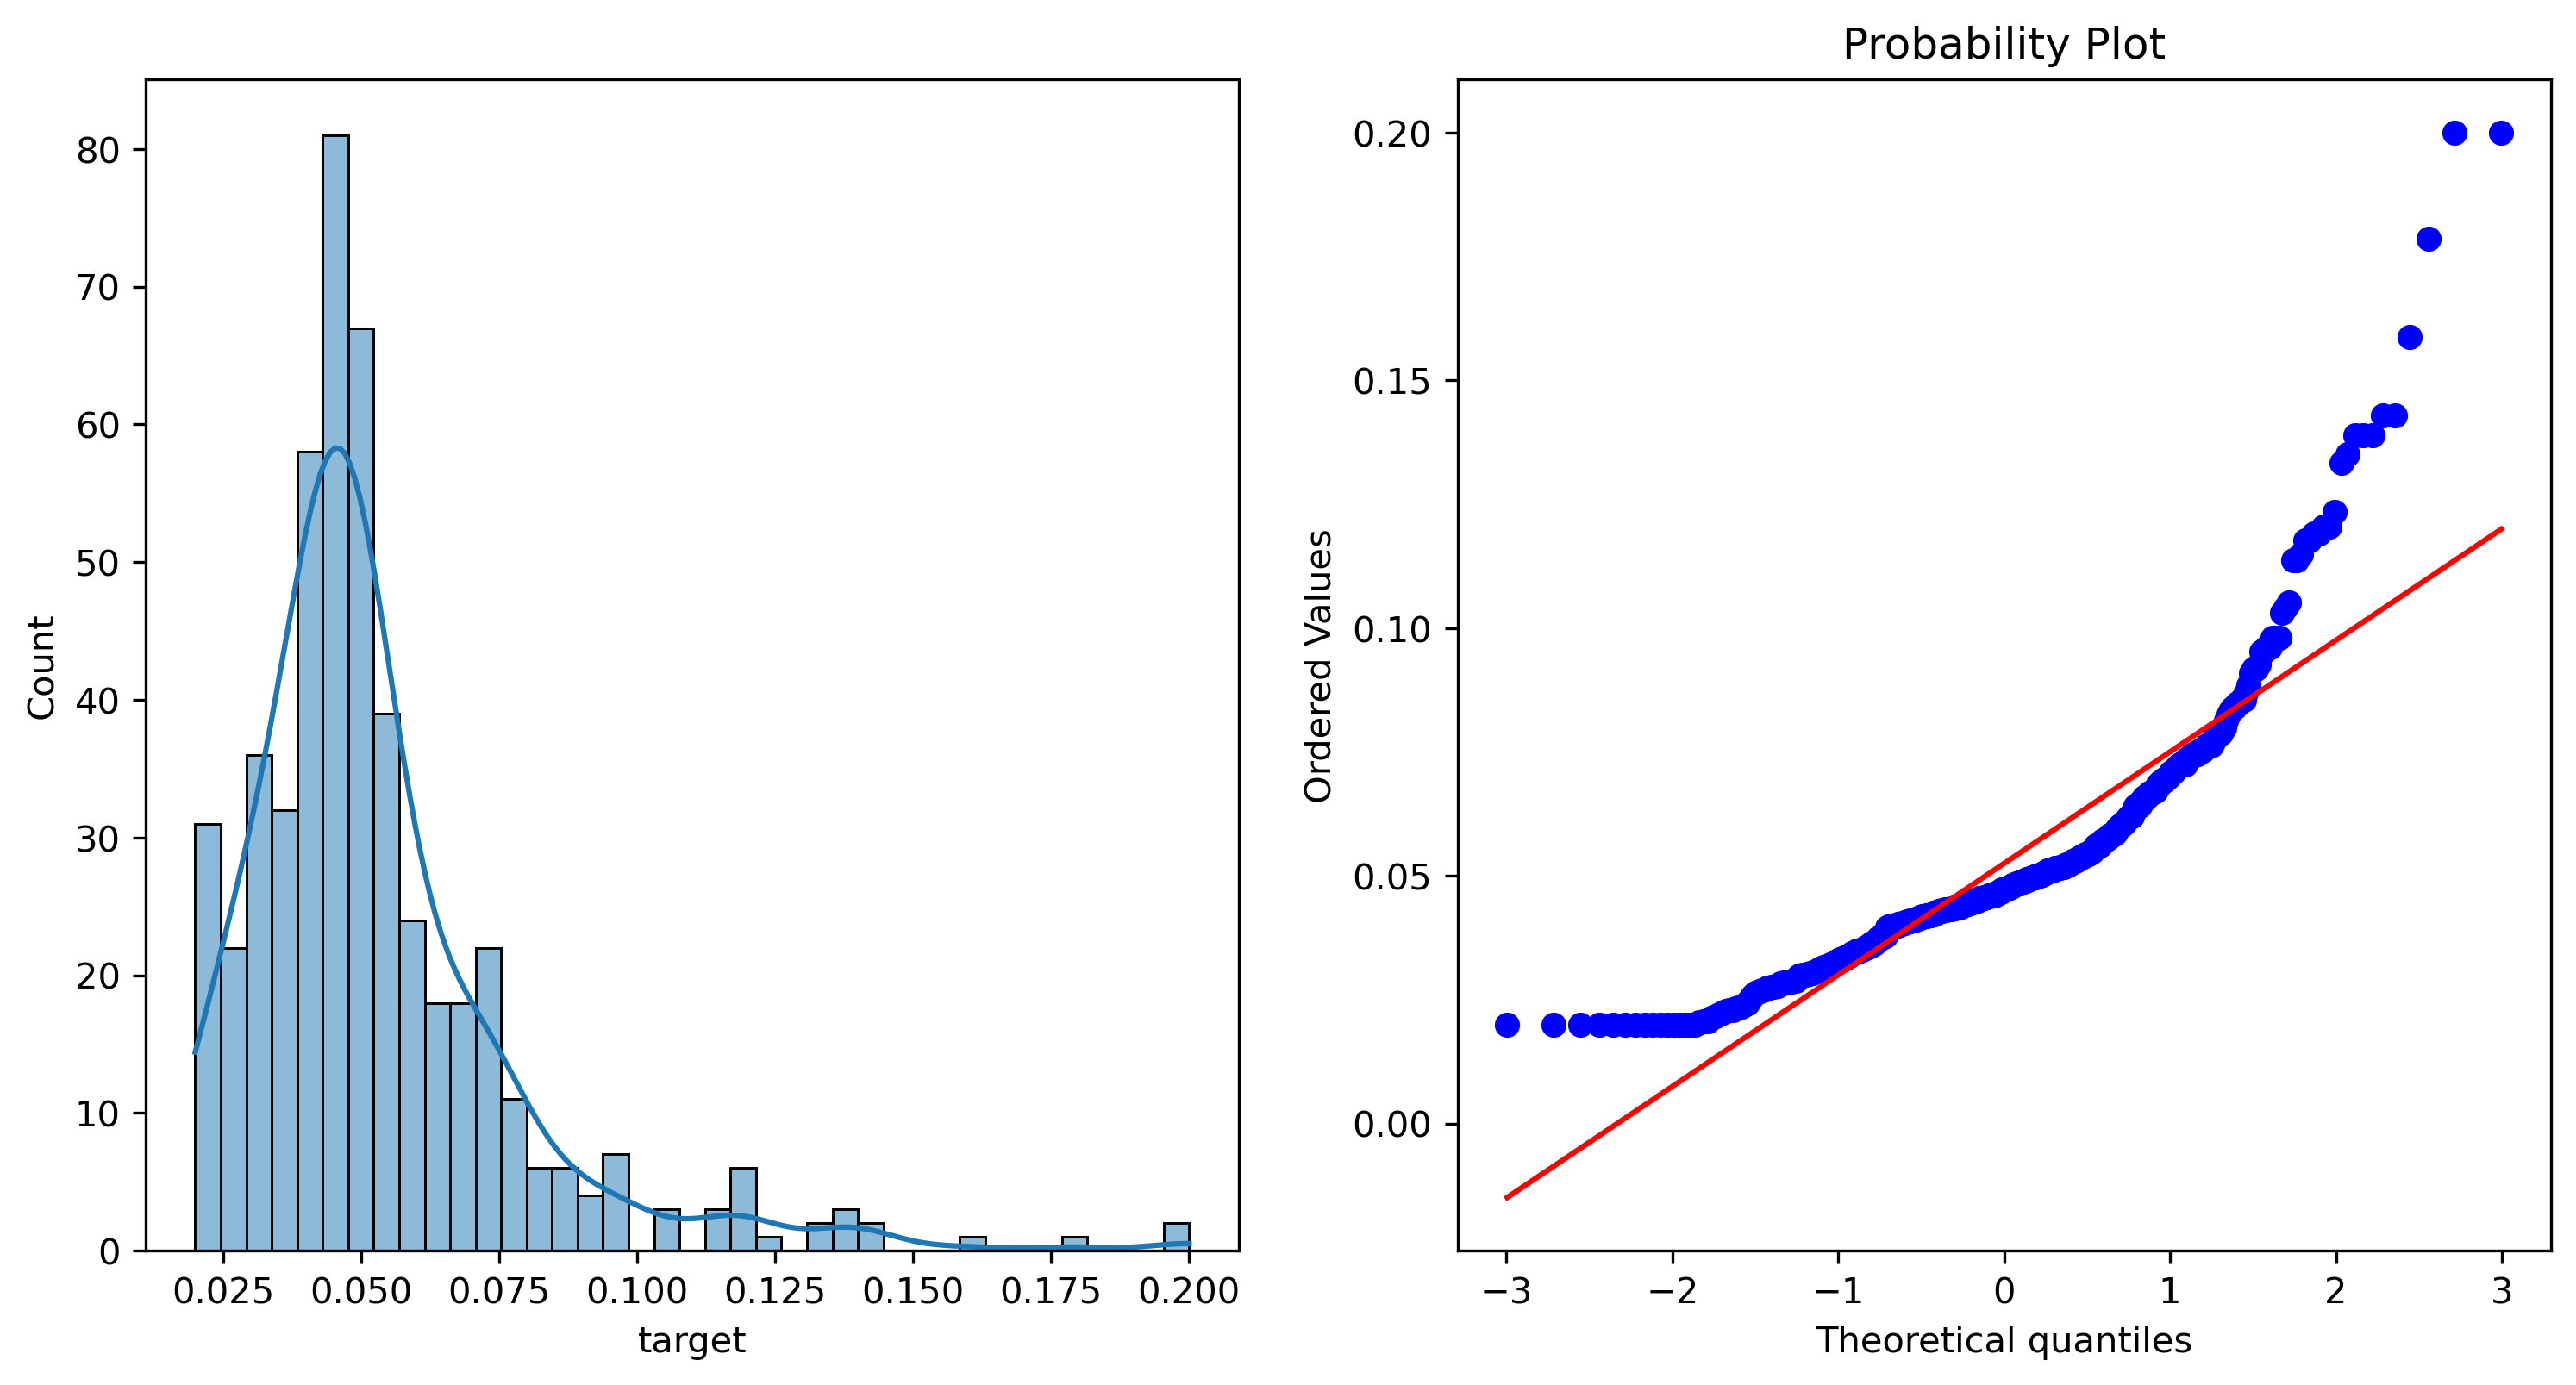

In [16]:
dist_(rec_scl_data,'target')

## Using square and cube root to transform variables
The square and cube root transformations are two specific forms of power transformations where the exponents
are 1/2 and 1/3, respectively

In [17]:
def squareRoot(data,feature):
    return np.power(data[feature],1/2)

def cubeRoot(data,feature):
    return np.power(data[feature],1/3)

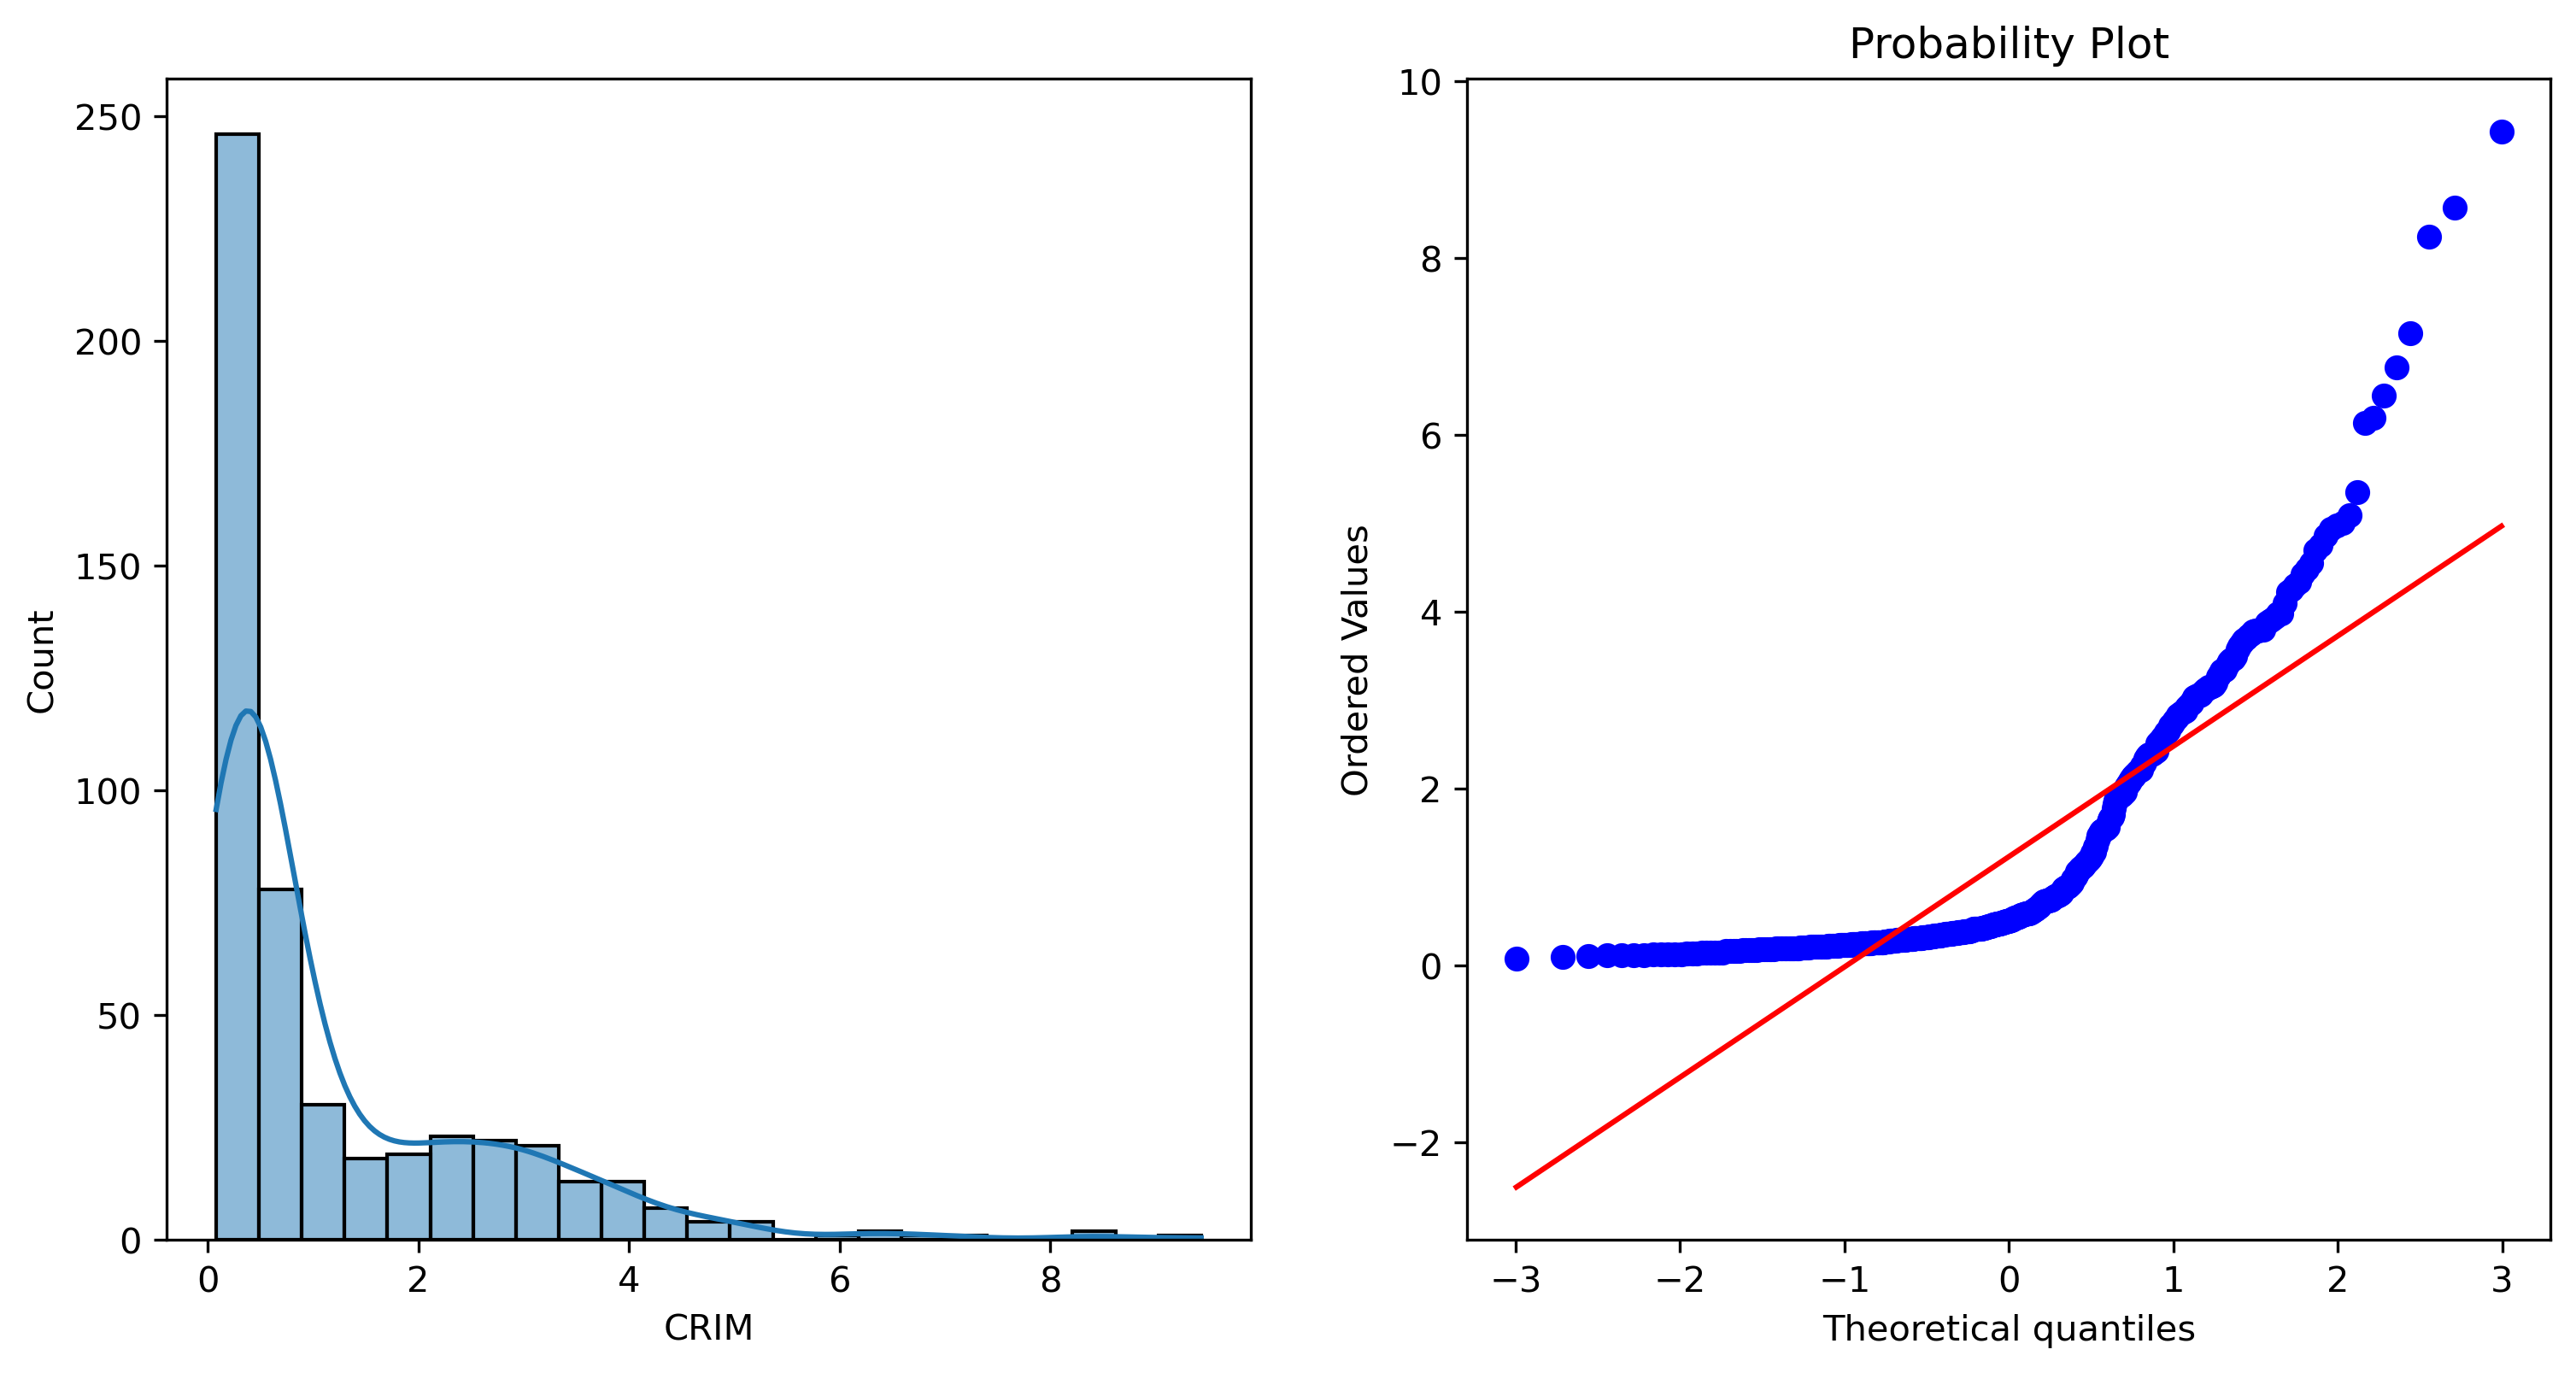

In [18]:
plt.figure(figsize=[12,6],dpi=300)
plt.subplot(1,2,1)
sns.histplot(x=squareRoot(df,'CRIM'),kde=True)
plt.subplot(1,2,2)
ss.probplot(x=squareRoot(df,'CRIM'),dist='norm',plot=plt)
plt.show()

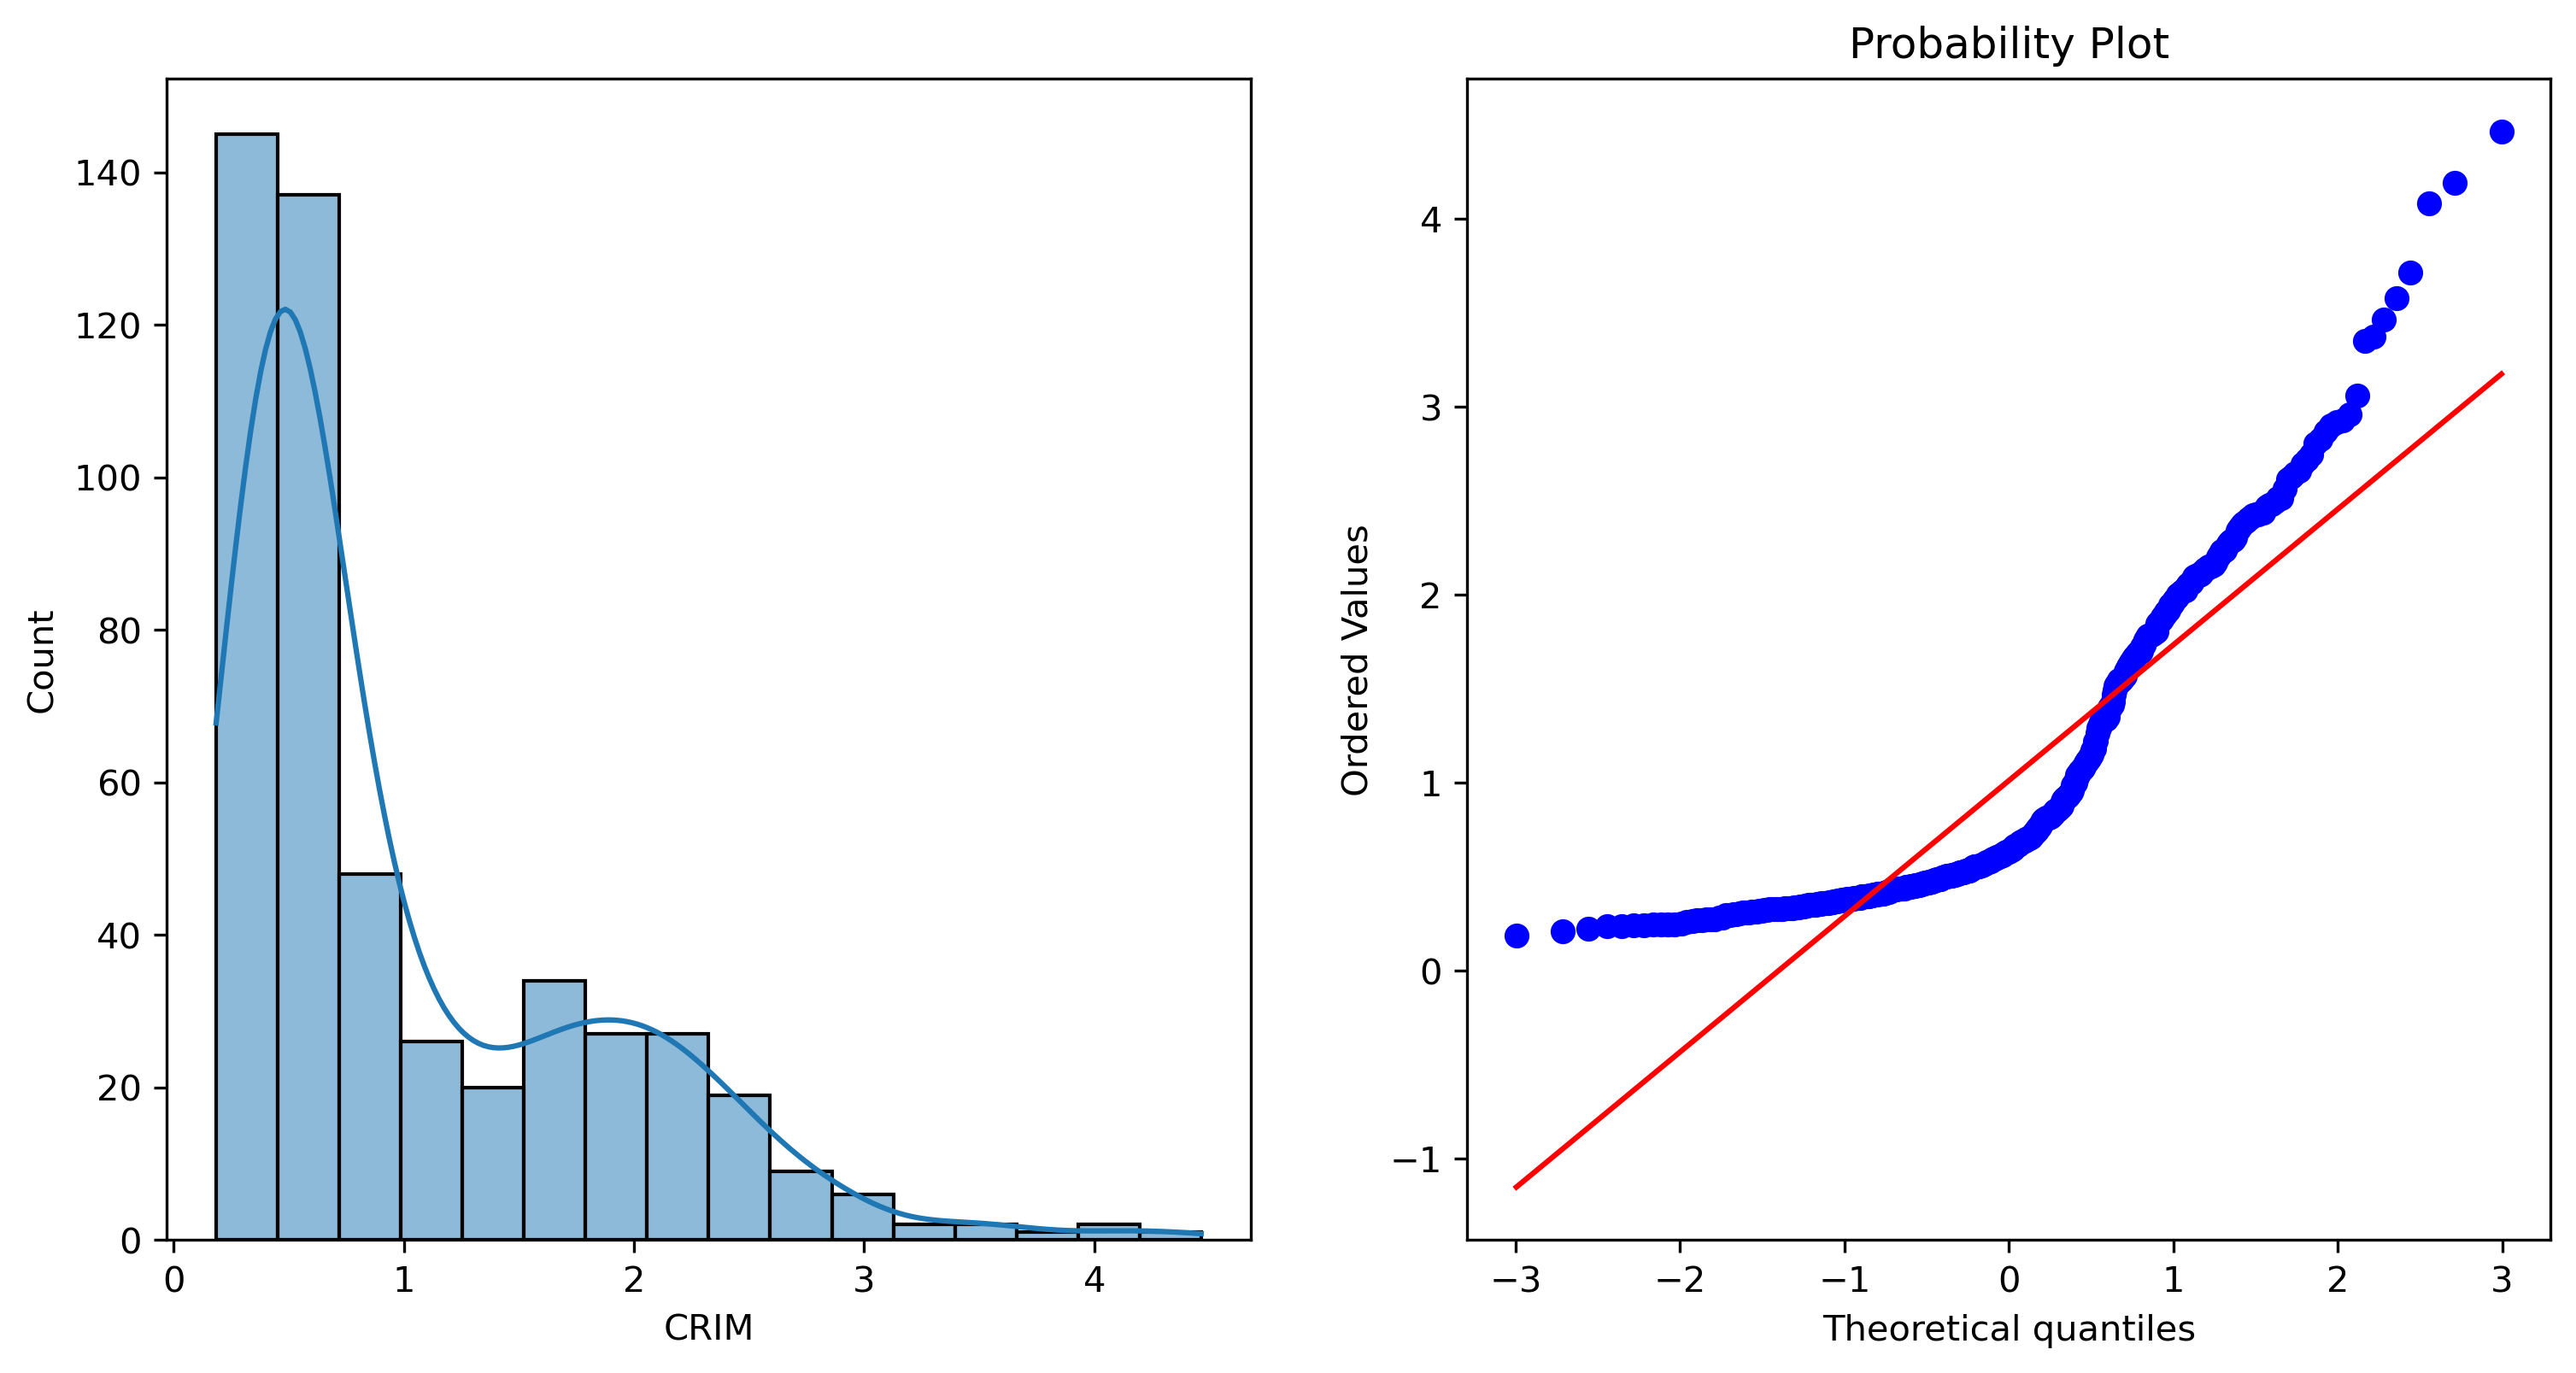

In [19]:
plt.figure(figsize=[12,6],dpi=300)
plt.subplot(1,2,1)
sns.histplot(x=cubeRoot(df,'CRIM'),kde=True)
plt.subplot(1,2,2)
ss.probplot(x=cubeRoot(df,'CRIM'),dist='norm',plot=plt)
plt.show()

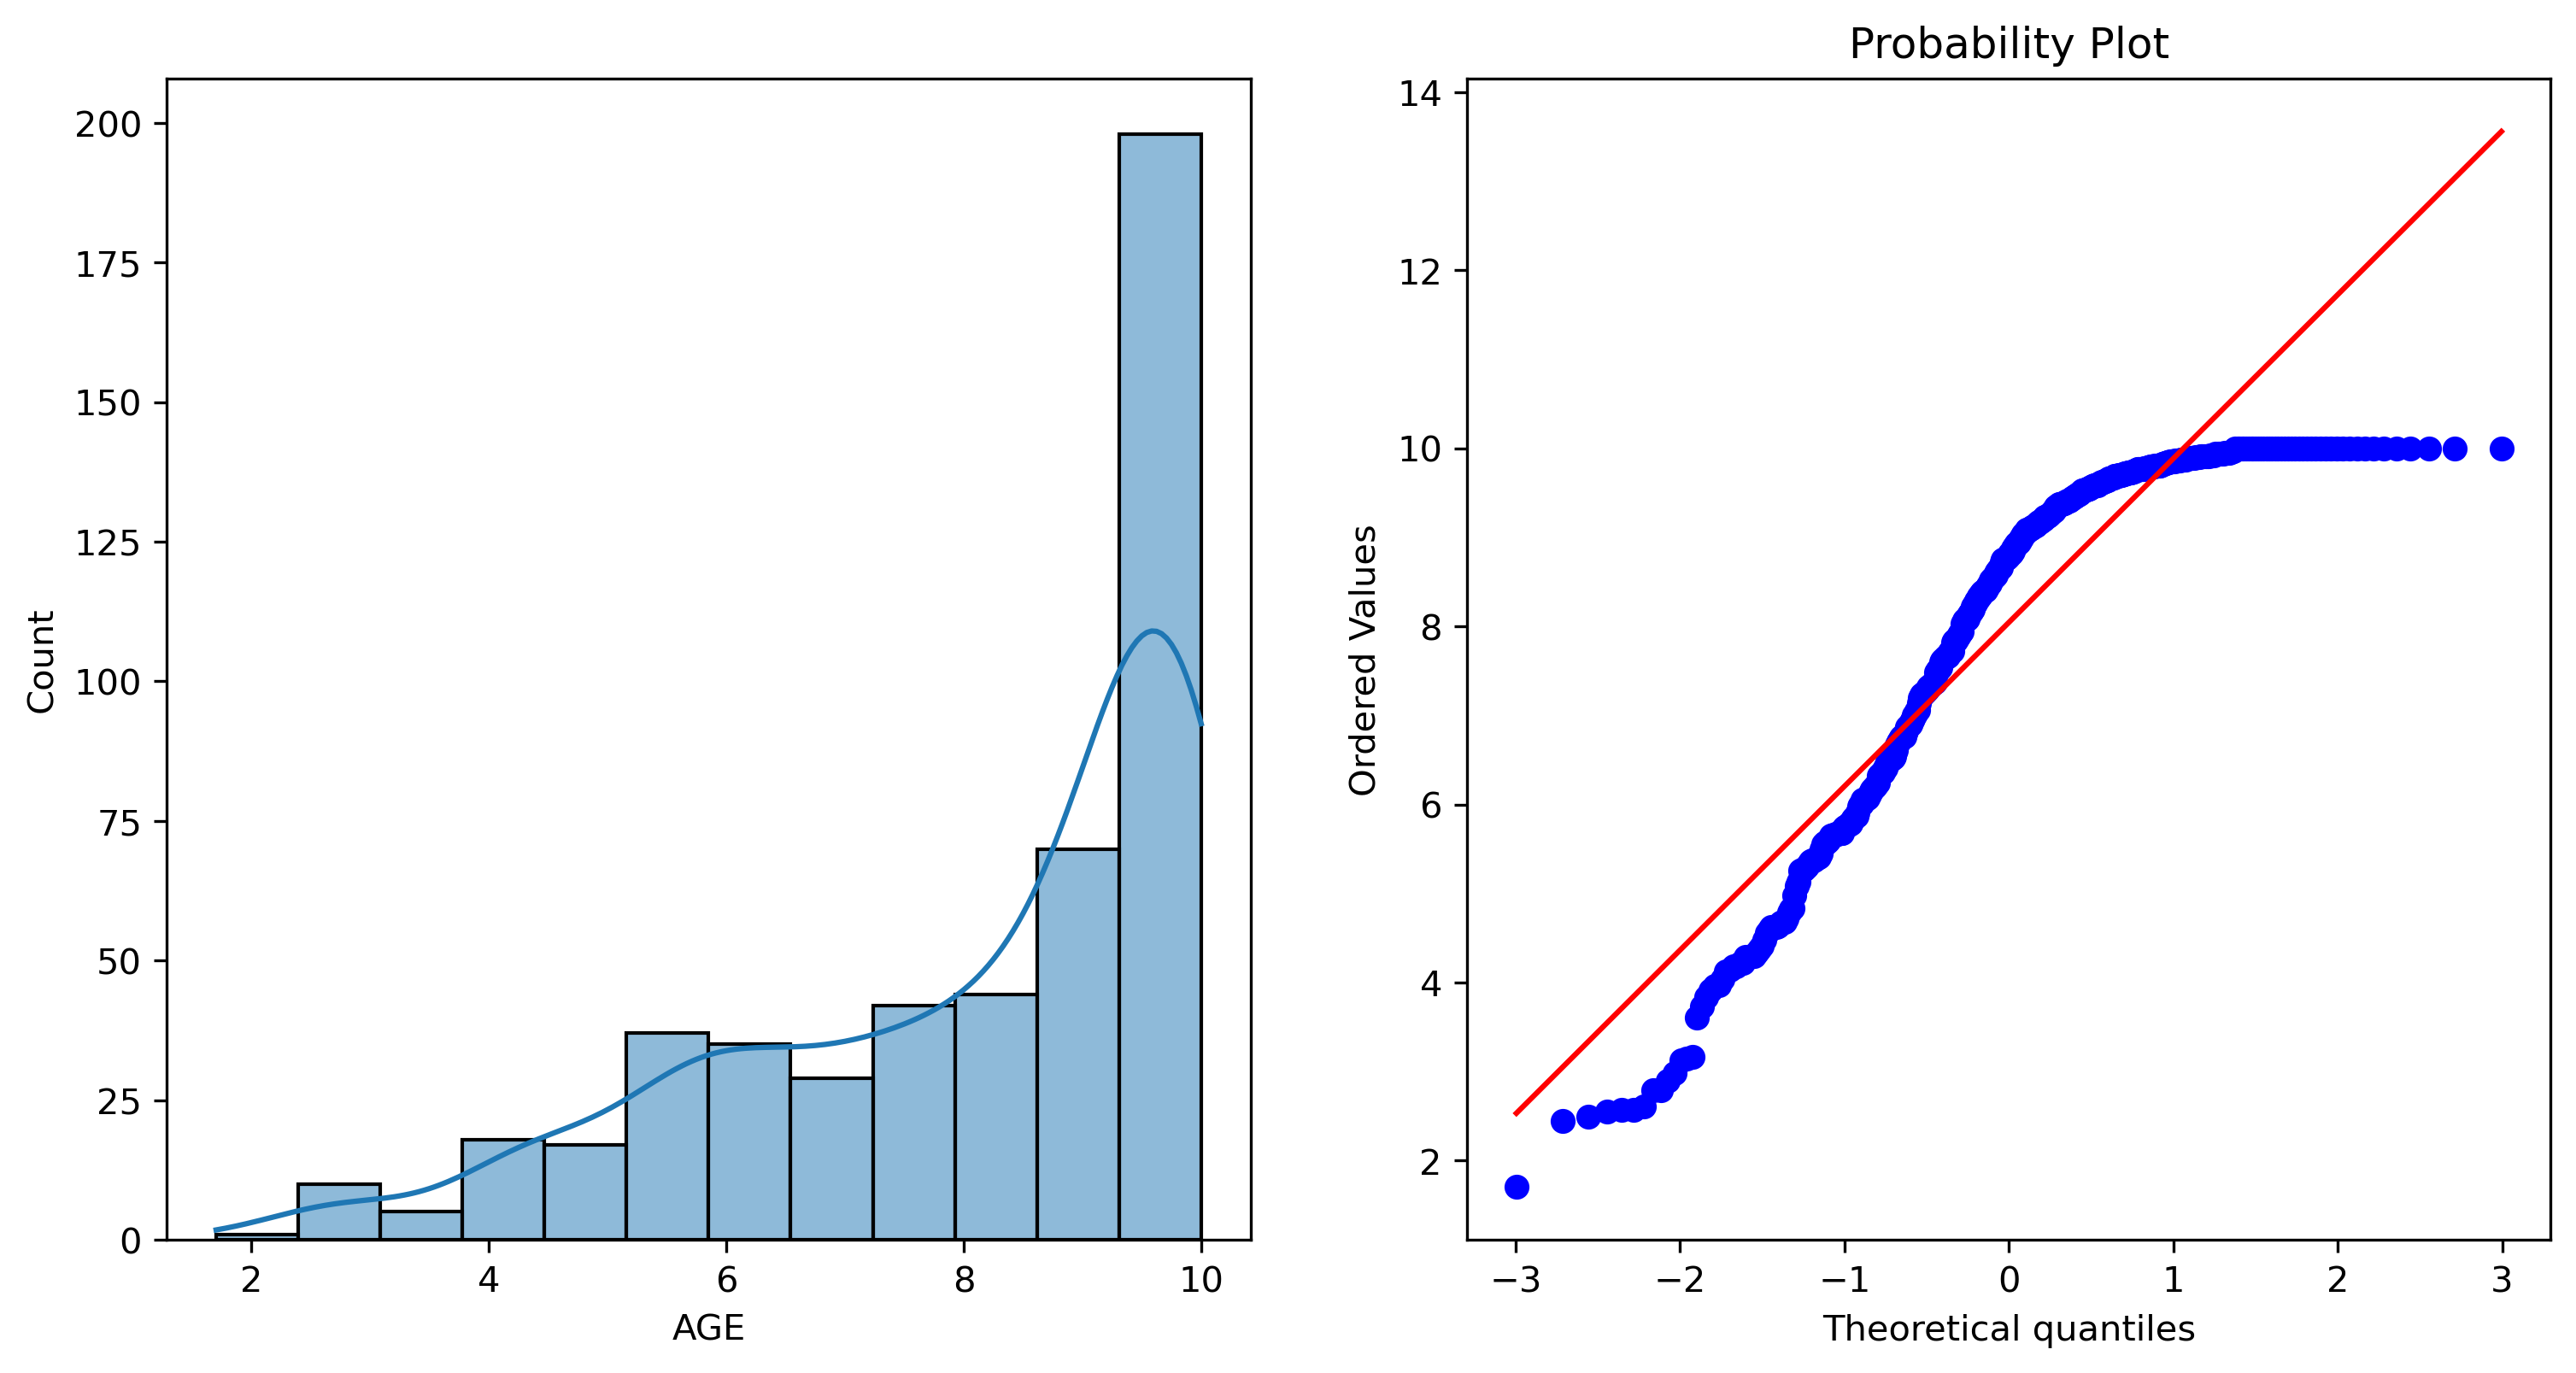

In [20]:
transformer = trans.PowerTransformer(exp=0.5,variables=['AGE'])
transformer.fit(df)
dist_(transformer.transform(df),'AGE')

## Using power transformations on numerical variables
The square and cube root transformations are special cases of power transformations where lambda is 1/2 or 1/3,
respectively. In practice, we try different lambdas to determine which one offers the best transformation.

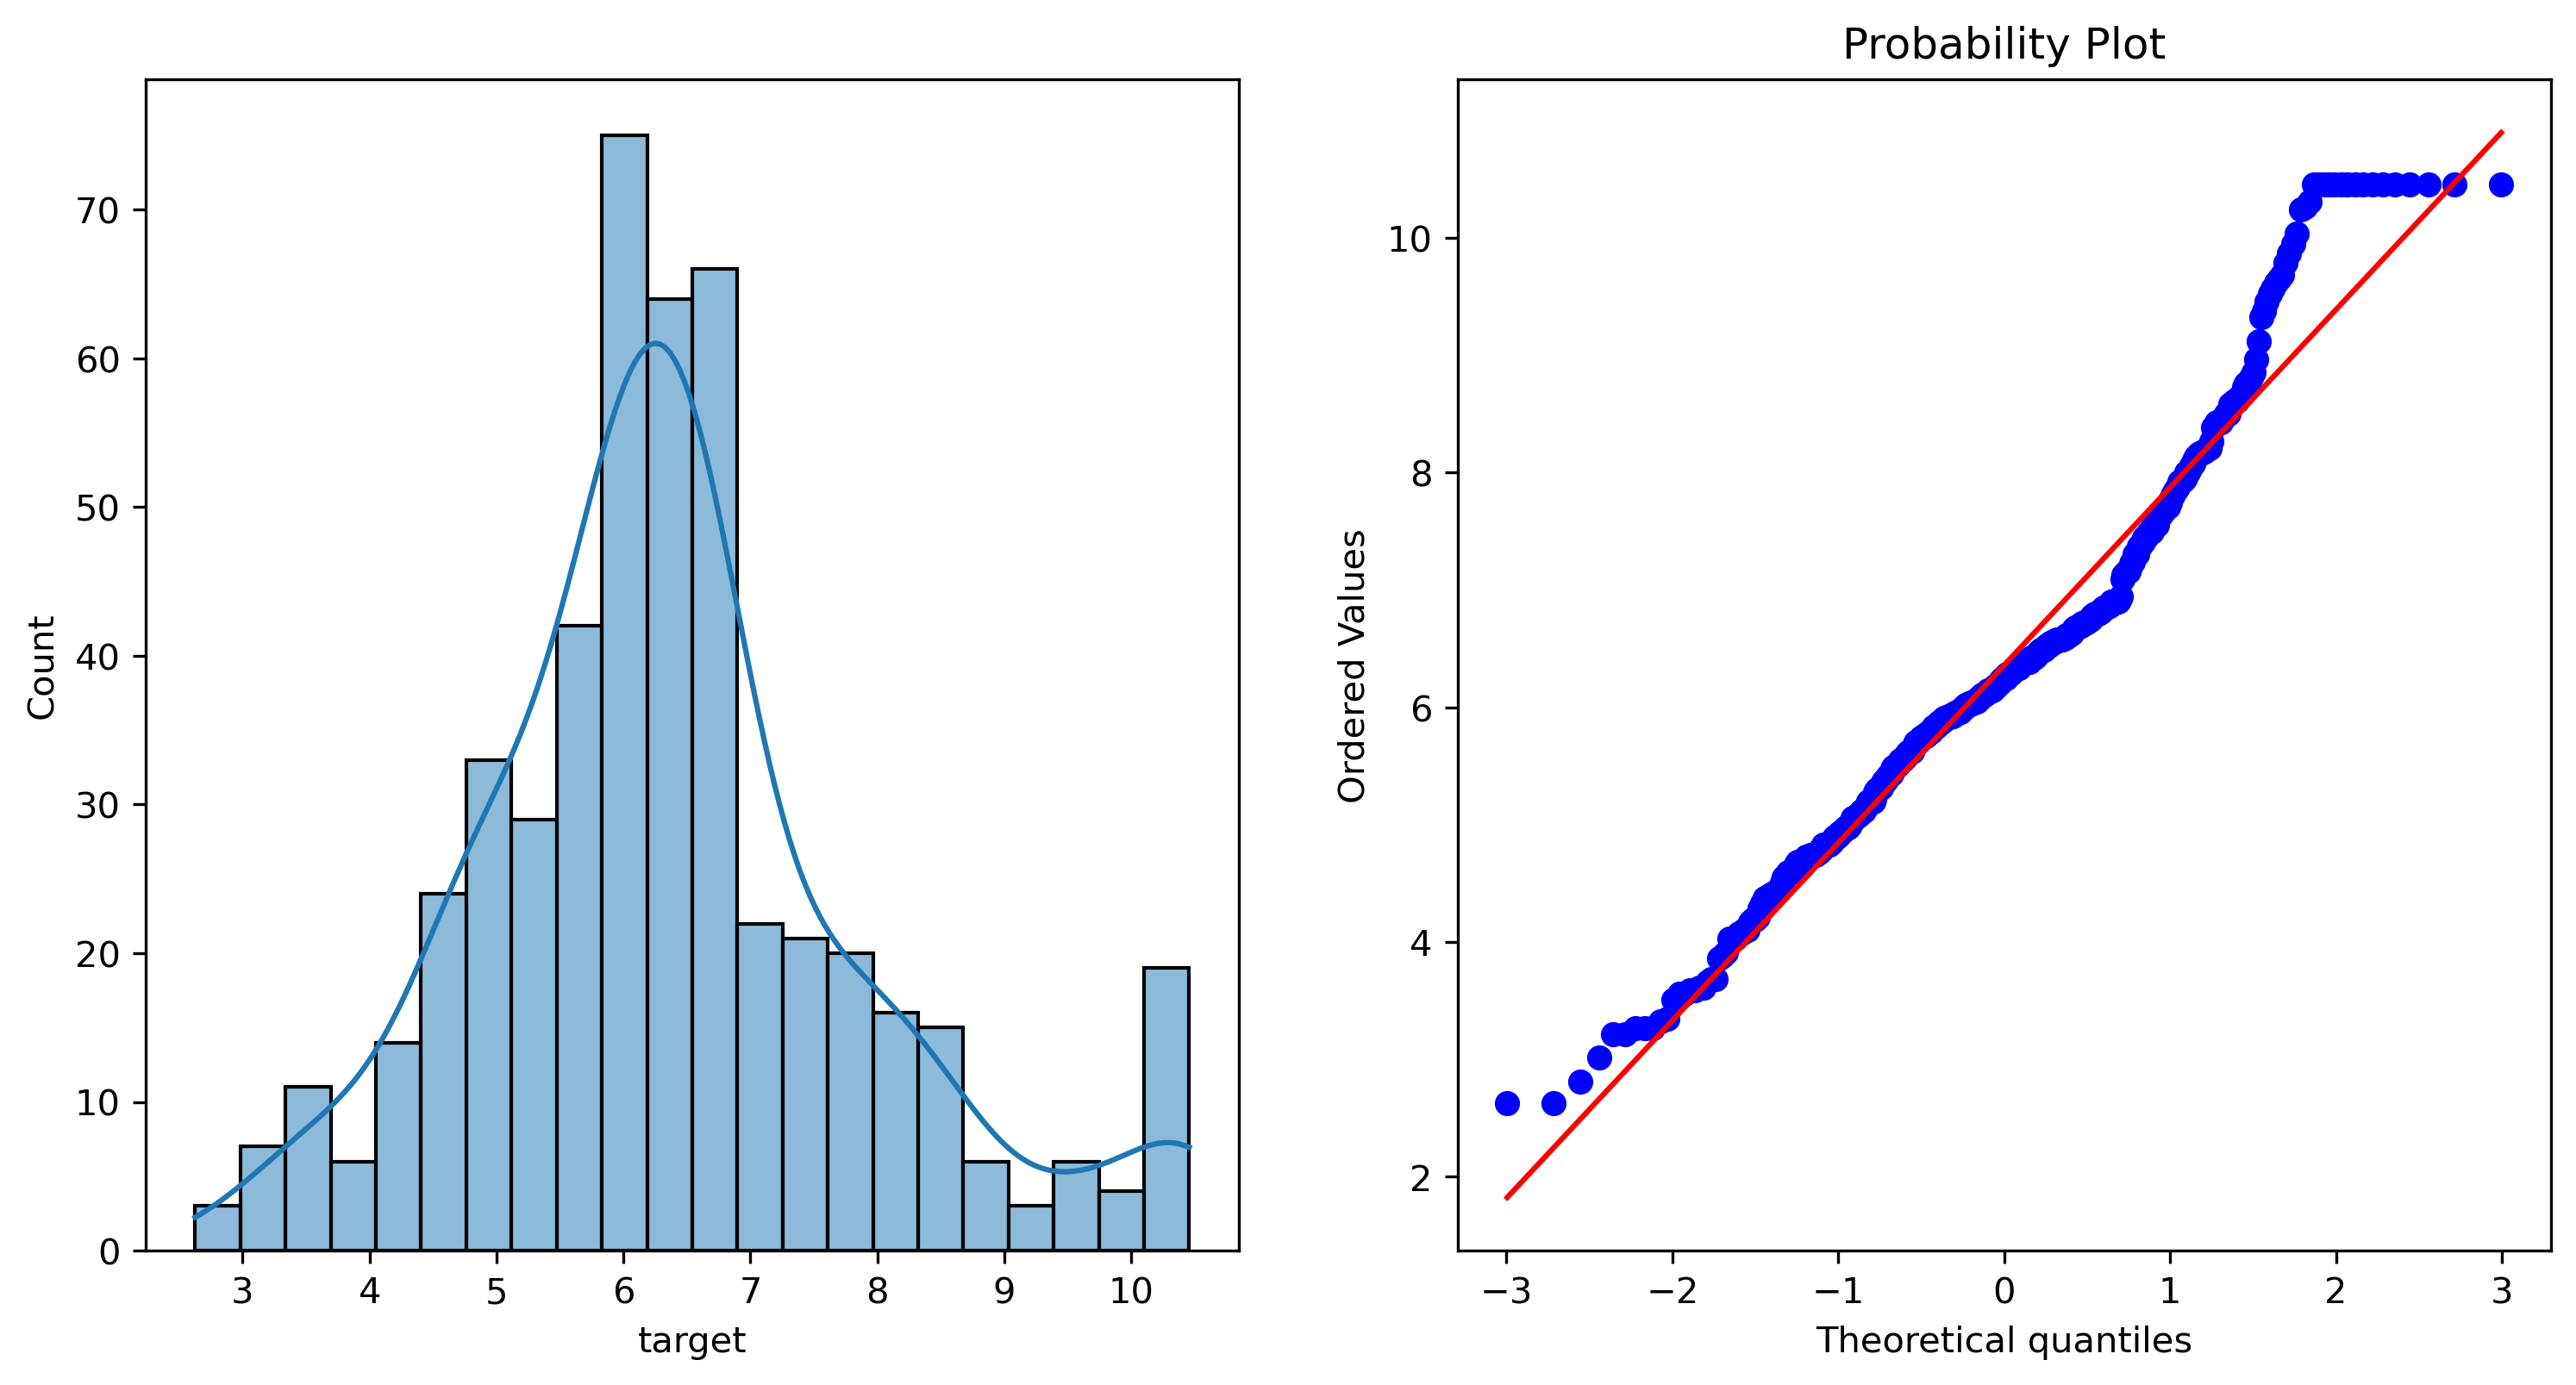

In [21]:
transformer = trans.PowerTransformer(exp=0.6,variables=['target'])
transformer.fit(df)
dist_(transformer.transform(df),'target')

## Performing Box-Cox transformation on numerical variables
The Box-Cox transformation belongs to the power family of functions and is defined by  if X > 0 or log(X) if X = 0,
where X is the variable and λ is the transformation parameter. In the Box-Cox transformation, several values of λ
are considered and the λ that returns the best transformation is selected.

In [24]:
BC_trans_data,param = ss.boxcox(df['target'])
param

0.2166209012915364

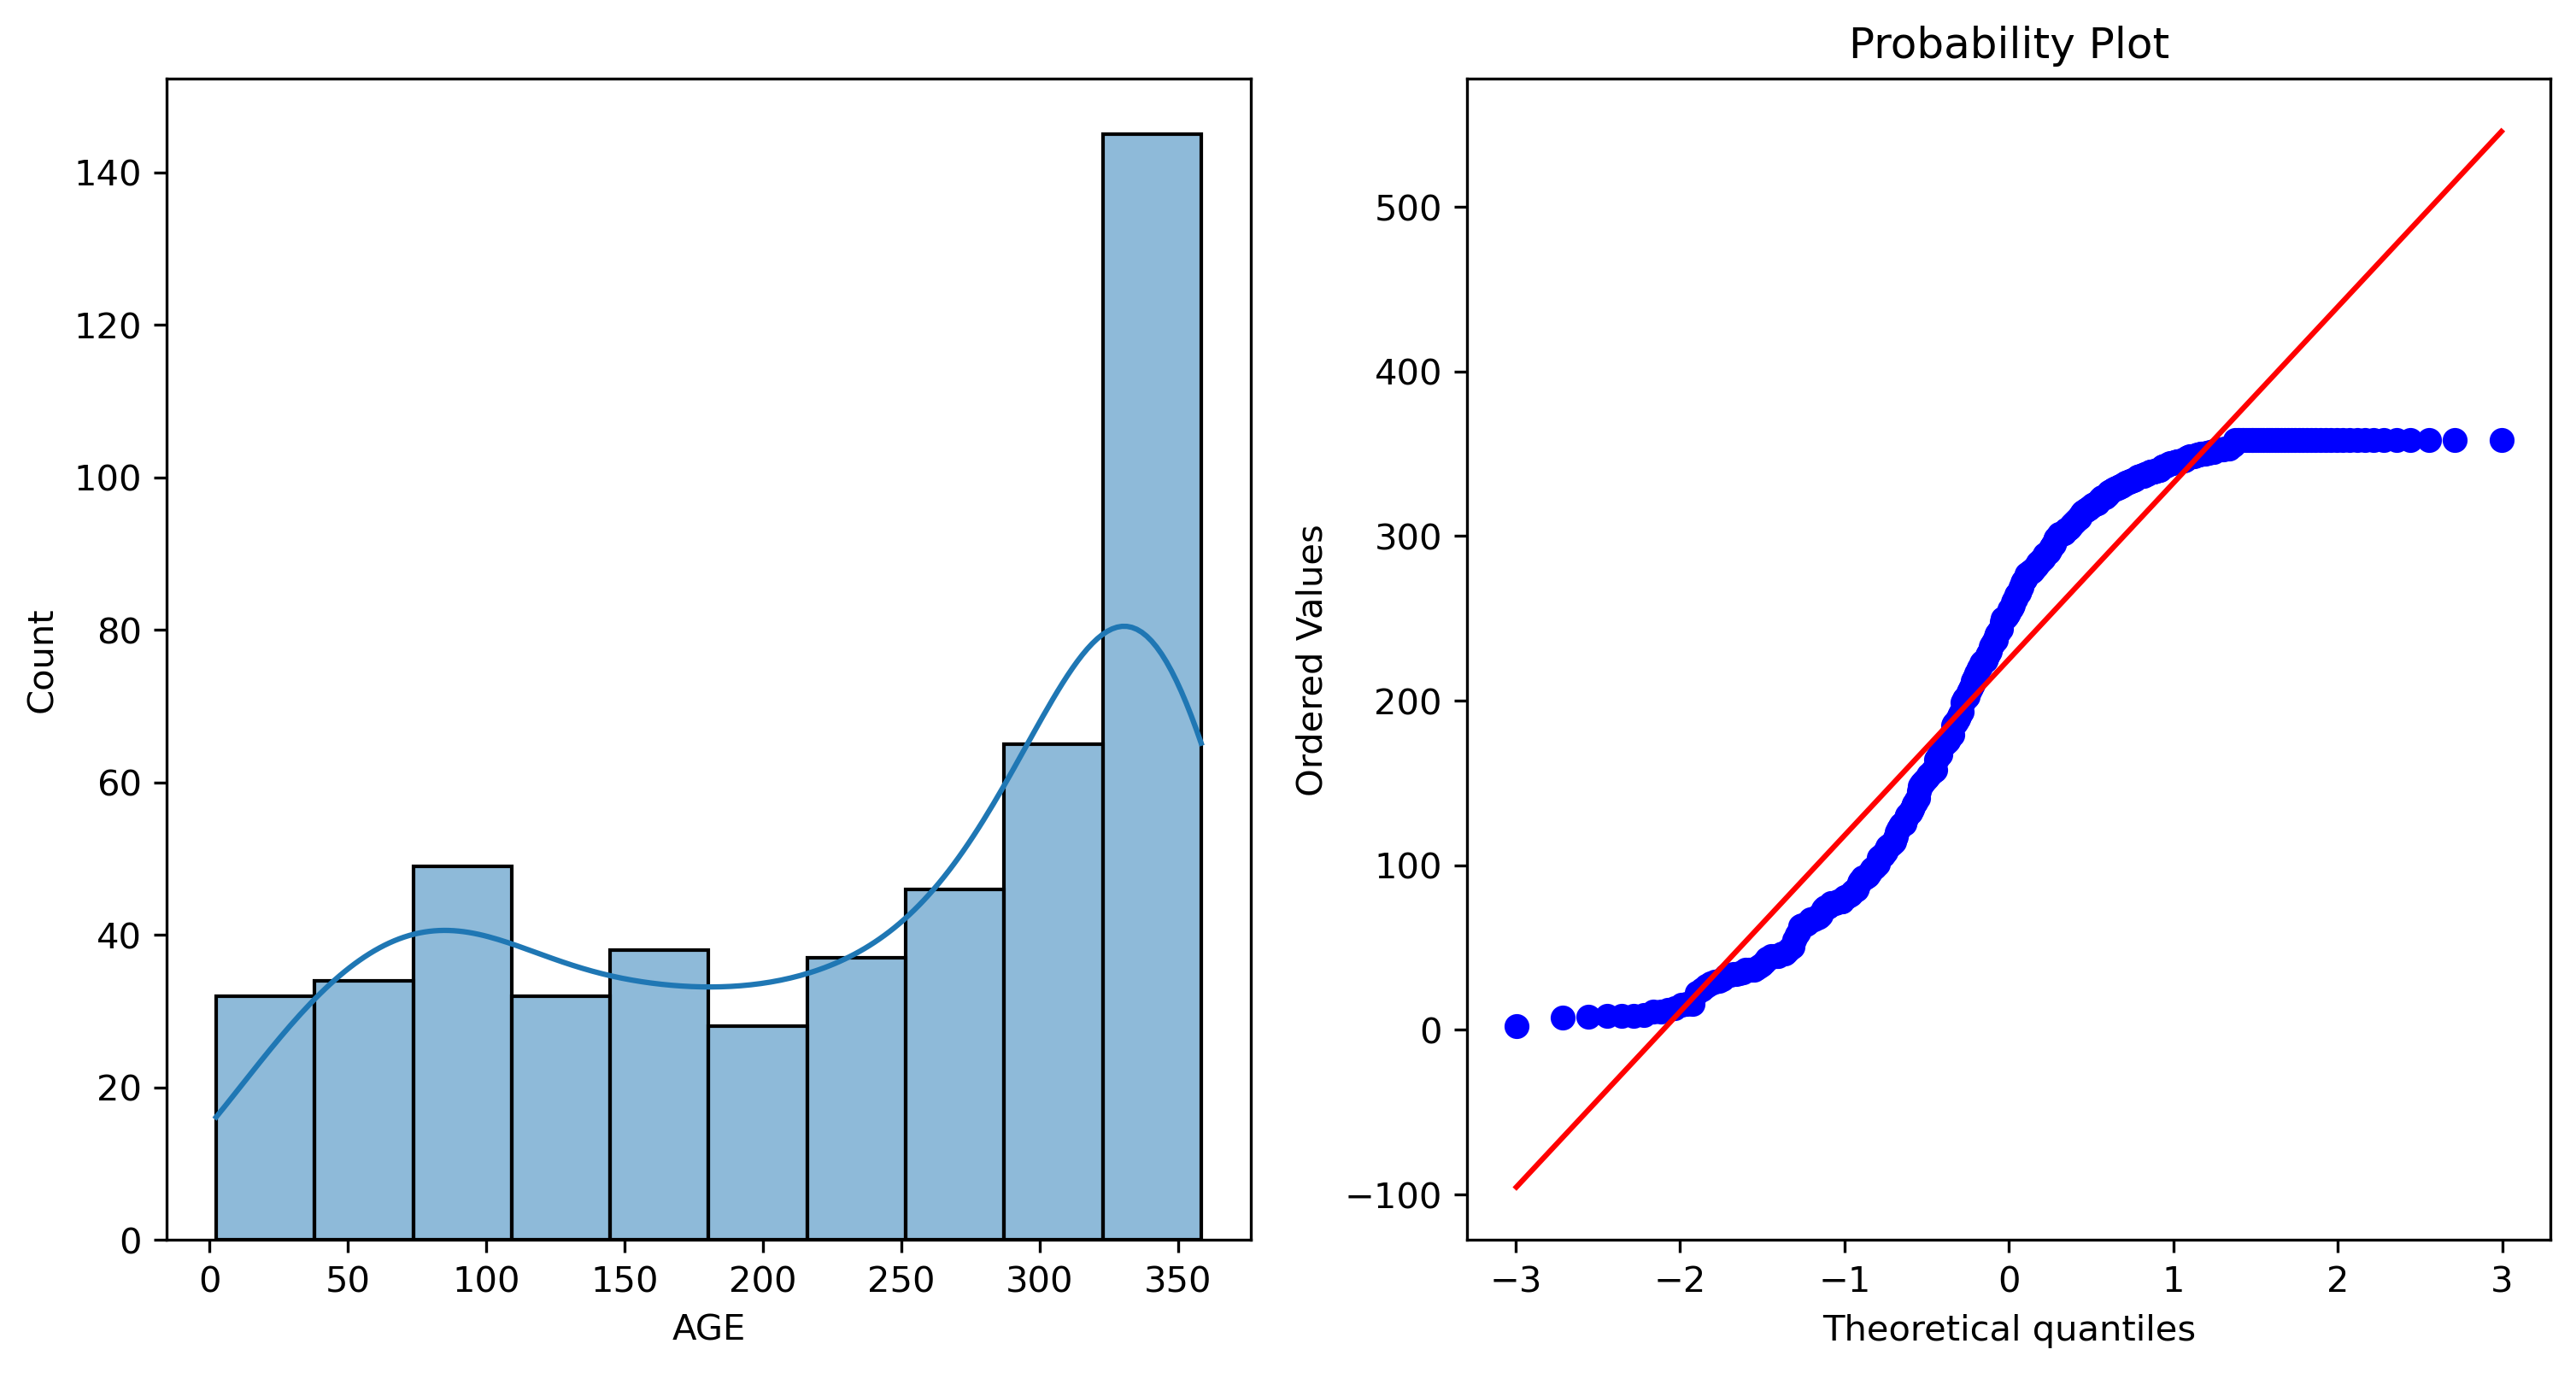

In [29]:
transformer = trans.BoxCoxTransformer(variables=['AGE'])
transformer.fit(df)
dist_(transformer.transform(df),'AGE')

In [30]:
transformer.lambda_dict_

{'AGE': 1.3414473519532712}

## Performing Yeo-Johnson transformation
The Yeo-Johnson transformation is an extension of the Box-Cox transformation and can be used on variables with
zero and negative values, as well as positive values.

In [31]:
YJ_trans_data,param = ss.yeojohnson(df['AGE'])
param

1.366140054212762

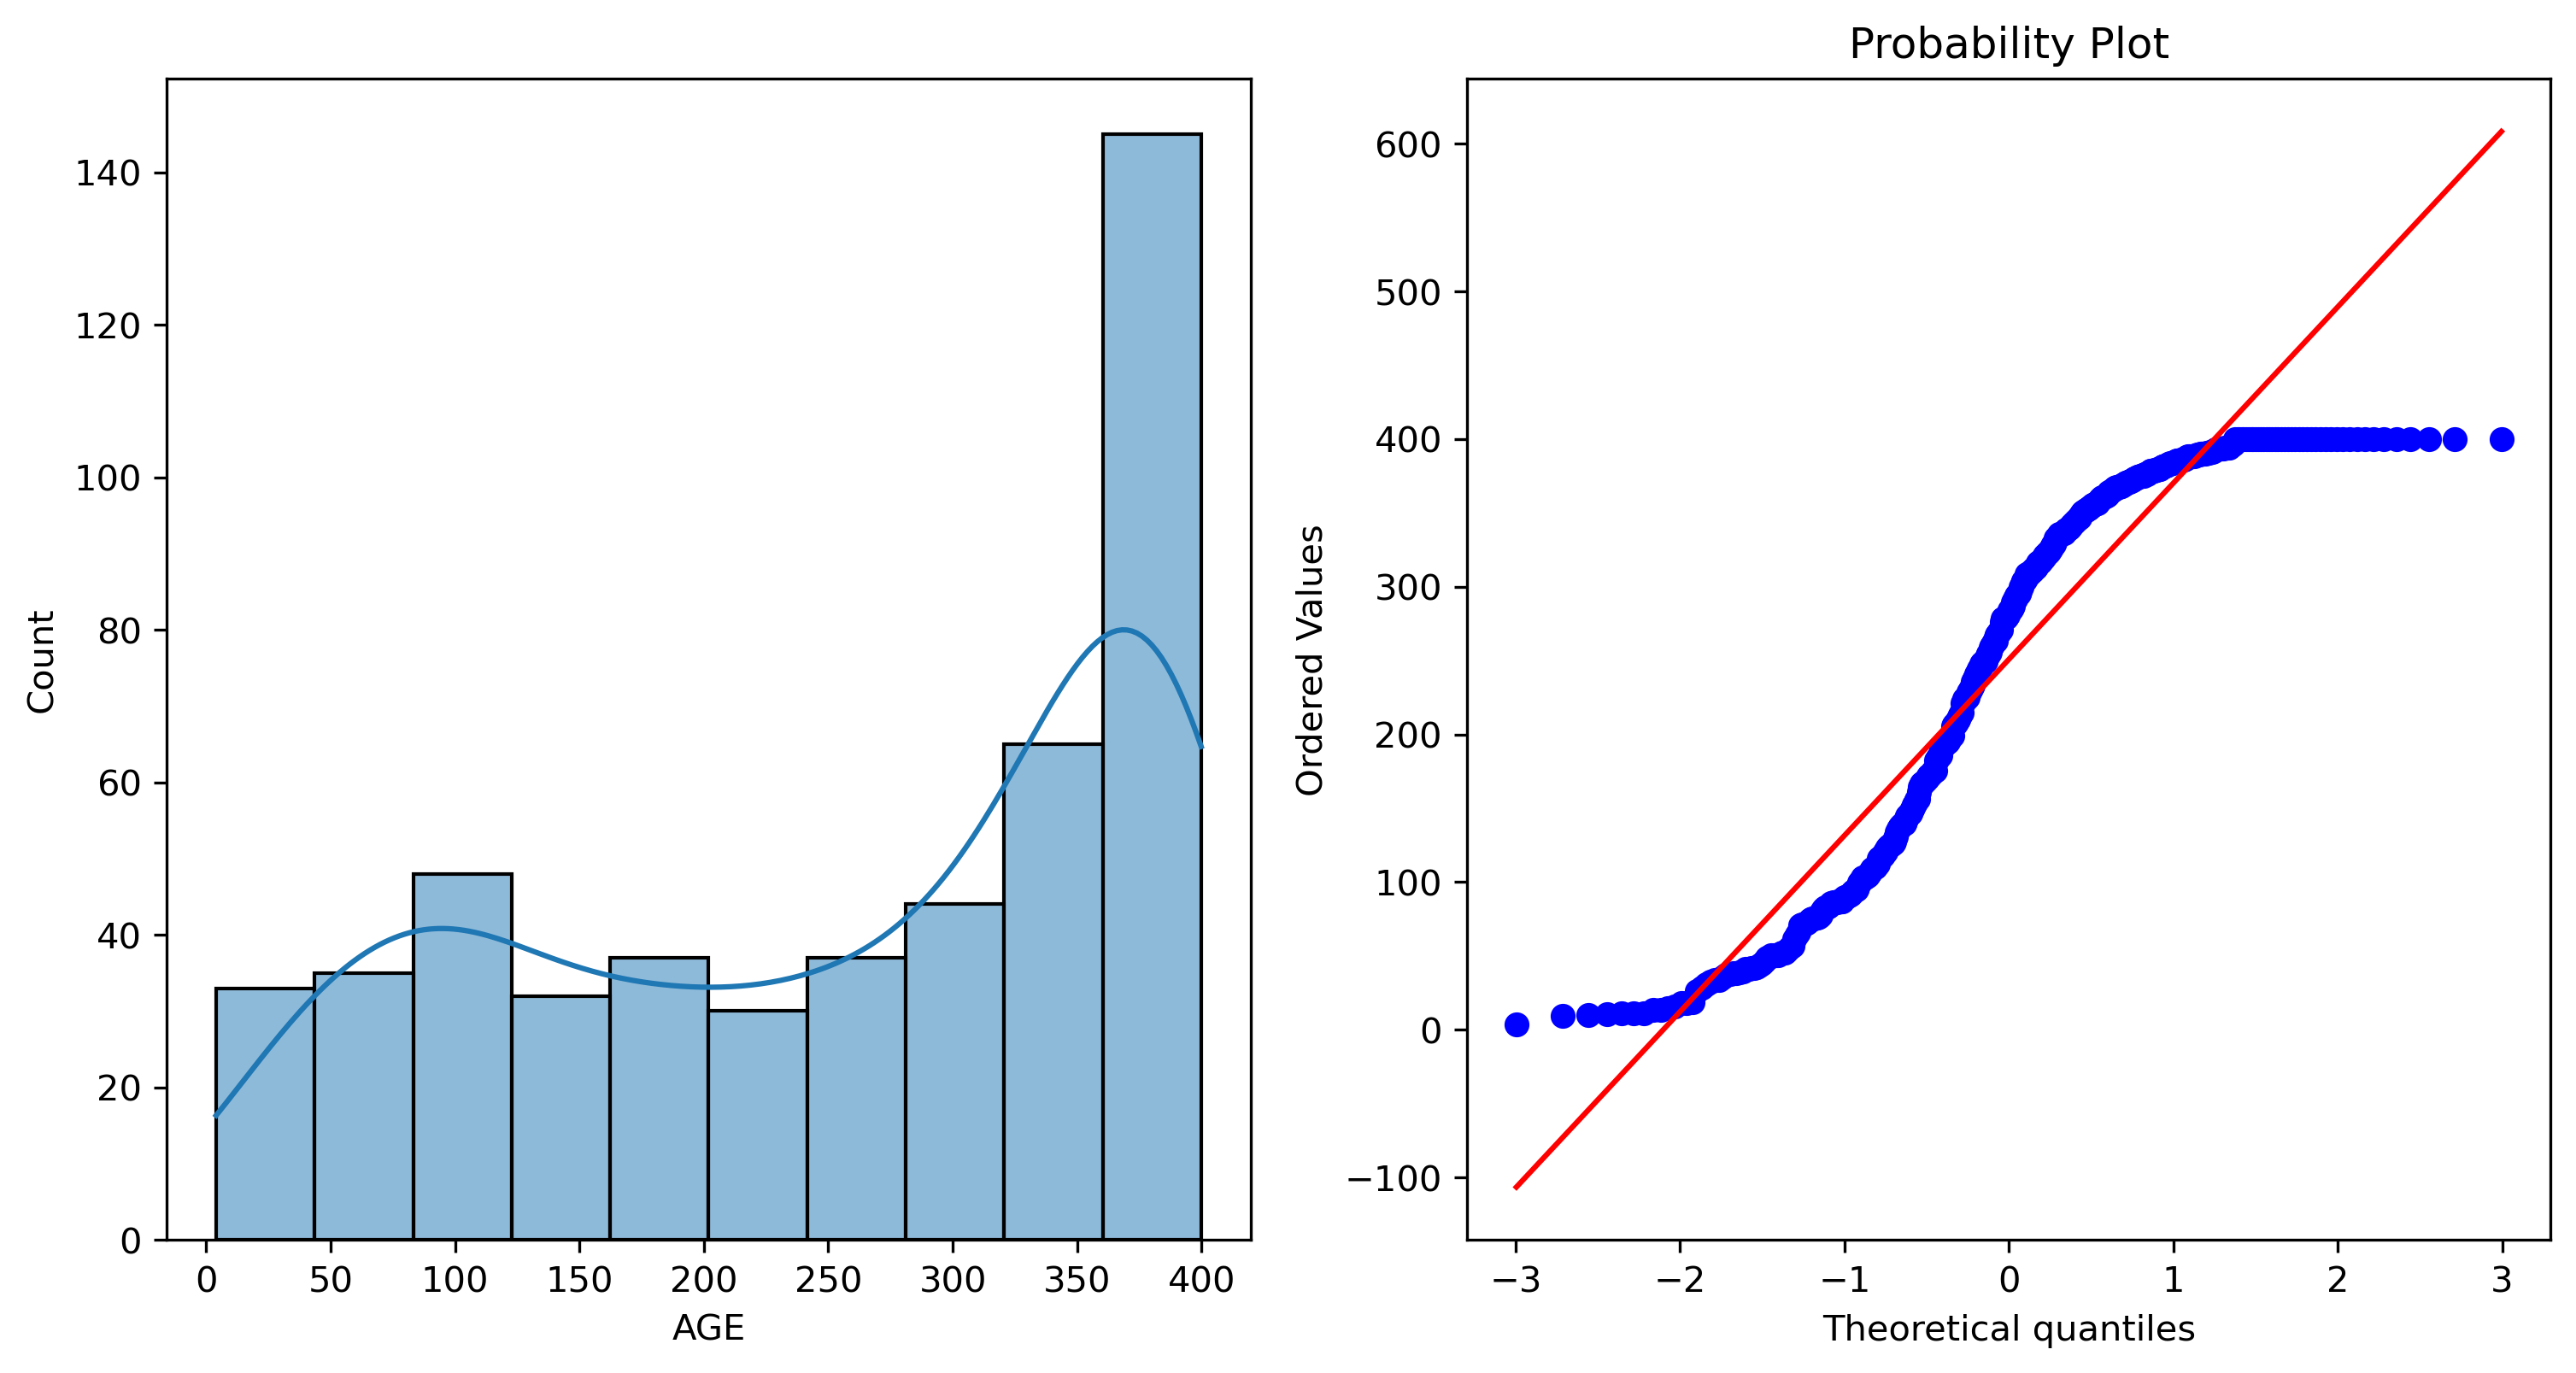

In [32]:
transformer = trans.yeojohnson.YeoJohnsonTransformer(variables=['AGE'])
transformer.fit(df)
dist_(transformer.transform(df),'AGE')